### Lending Club Case Study

  

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels --q

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 130)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/loan.csv')

In [4]:
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83     C        C4   
2       36 months   15.96%        84.33     C        C5   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
...           ...      ...          ...   ...       ...   
39712   36 months    8.07%        78.42     A        A4   
39713   36 months   10.28%       275.38     C        C1   
39714   36 months    8.07%       156.84     A        A4   
39715   36 months    7.43%       155.38     A        A2   
39716   36 months   13.75%       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                             NaN  10+ years           RENT     24000.0   
1                           Ryder   < 1 year           RENT     30000.0   
2                             NaN  10+ years           RENT     12252.0   
3             AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        University Medical Group     1 year           RENT     80000.0   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE    110000.0   
39713  Squarewave Solutions, Ltd.    3 years           RENT     18000.0   
39714                         NaN   < 1 year       MORTGAGE    100000.0   
39715                         NaN   < 1 year       MORTGAGE    200000.0   
39716            Evergreen Center   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11      Current          n   
...                   ...     ...          ...        ...   
39712        Not Verified  Jul-07   Fully Paid          n   
39713        Not Verified  Jul-07   Fully Paid          n   
39714        Not Verified  Jul-07   Fully Paid          n   
39715        Not Verified  Jul-07   Fully Paid          n   
39716        Not Verified  Jun-07   Fully Paid          n   

                                                     url  \
0      https://lendingclub.com/browse/loanDetail.acti...   
1      https://lendingclub.com/browse/loanDetail.acti...   
2      https://lendingclub.com/browse/loanDetail.acti...   
3      https://lendingclub.com/browse/loanDetail.acti...   
4      https://lendingclub.com/browse/loanDetail.acti...   
...                                                  ...   
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
0        Borrower added on 

Since we are trying to build a model here which will predict either fully paid or charged off and we can't do much prediction about the current customer since they are still paying the loan. So it makes sense to drop the column with 'current' as its loan_status.

In [5]:
df = df[df['loan_status'] != 'Current']

In [6]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade             emp_title emp_length  \
0   10.65%       162.87     B        B2                   NaN  10+ years   
1   15.27%        59.83     C        C4                 Ryder   < 1 year   
2   15.96%        84.33     C        C5                   NaN  10+ years   
3   13.49%       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5    7.90%       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Jan-85               1                     NaN   
1            0           Apr-99               5                     NaN   
2            0           Nov-01               2                     NaN   
3            0           Feb-96               1                    35.0   
5            0           Nov-04               3                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
5                     NaN         9        0       7963     28.30%         12   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f        0.0            0.0   5863.155187   
1                   f        0.0            0.0   1008.710000   
2                   f        0.0            0.0   3005.666844   
3                   f        0.0            0.0  12231.890000   
5                   f        0.0            0.0   5632.210000   

   total_pymnt_inv  total_rec_prncp  total_rec_int 

In [7]:
MissingDataPercentage = df.isnull().sum()*100/len(df)

MissingDataDF = pd.DataFrame({'column_name': df.columns, 'MissingDataInPercentage': MissingDataPercentage.round(2)})
MissingDataDF.sort_values('MissingDataInPercentage', inplace=True, ascending=False)
MissingDataDF

column_name  \
verification_status_joint            verification_status_joint   
annual_inc_joint                              annual_inc_joint   
mo_sin_old_rev_tl_op                      mo_sin_old_rev_tl_op   
mo_sin_old_il_acct                          mo_sin_old_il_acct   
bc_util                                                bc_util   
bc_open_to_buy                                  bc_open_to_buy   
avg_cur_bal                                        avg_cur_bal   
acc_open_past_24mths                      acc_open_past_24mths   
inq_last_12m                                      inq_last_12m   
total_cu_tl                                        total_cu_tl   
inq_fi                                                  inq_fi   
total_rev_hi_lim                              total_rev_hi_lim   
all_util                                              all_util   
max_bal_bc                                          max_bal_bc   
open_rv_24m                                        open_rv_24m   
open_rv_12m                                        open_rv_12m   
il_util                                                il_util   
total_bal_il                                      total_bal_il   
mths_since_rcnt_il                          mths_since_rcnt_il   
open_il_24m                                        open_il_24m   
open_il_12m                                        open_il_12m   
open_il_6m                                          open_il_6m   
open_acc_6m                                        open_acc_6m   
tot_cur_bal                                        tot_cur_bal   
tot_coll_amt                                      tot_coll_amt   
mo_sin_rcnt_rev_tl_op                    mo_sin_rcnt_rev_tl_op   
mo_sin_rcnt_tl                                  mo_sin_rcnt_tl   
mort_acc                                              mort_acc   
num_rev_tl_bal_gt_0                        num_rev_tl_bal_gt_0   
total_bc_limit                                  total_bc_limit   
total_bal_ex_mort                            total_bal_ex_mort   
tot_hi_cred_lim                                tot_hi_cred_lim   
percent_bc_gt_75                              percent_bc_gt_75   
pct_tl_nvr_dlq                                  pct_tl_nvr_dlq   
num_tl_op_past_12m                          num_tl_op_past_12m   
num_tl_90g_dpd_24m                          num_tl_90g_dpd_24m   
num_tl_30dpd                                      num_tl_30dpd   
num_tl_120dpd_2m                              num_tl_120dpd_2m   
num_sats                                              num_sats   
num_rev_accts                                    num_rev_accts   
mths_since_recent_bc                      mths_since_recent_bc   
num_op_rev_tl                                    num_op_rev_tl   
num_il_tl                                            num_il_tl   
num_bc_tl                                            num_bc_tl   
num_bc_sats                                        num_bc_sats   
num_actv_rev_tl                                num_actv_rev_tl   
num_actv_bc_tl                                  num_actv_bc_tl   
num_accts_ever_120_pd                    num_accts_ever_120_pd   
mths_since_recent_revol_delinq  mths_since_recent_revol_delinq   
mths_since_recent_inq                    mths_since_recent_inq   
mths_since_recent_bc_dlq              mths_since_recent_bc_dlq   
dti_joint                                            dti_joint   
total_il_high_credit_limit          total_il_high_credit_limit   
mths_since_last_major_derog        mths_since_last_major_derog   
next_pymnt_d                                      next_pymnt_d   
mths_since_last_record                  mths_since_last_record   
mths_since_last_delinq                  mths_since_last_delinq   
desc                                                      desc   
emp_title                                            emp_title   
emp_length                                          emp_length   
pub_rec_bankruptcies     

In [8]:
#identifying columns with 100% missing values
ColumnsWithMissingValues= MissingDataDF[MissingDataDF['MissingDataInPercentage'] ==100].column_name
list(ColumnsWithMissingValues)

['verification_status_joint',
 'annual_inc_joint',
 'mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'bc_util',
 'bc_open_to_buy',
 'avg_cur_bal',
 'acc_open_past_24mths',
 'inq_last_12m',
 'total_cu_tl',
 'inq_fi',
 'total_rev_hi_lim',
 'all_util',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'il_util',
 'total_bal_il',
 'mths_since_rcnt_il',
 'open_il_24m',
 'open_il_12m',
 'open_il_6m',
 'open_acc_6m',
 'tot_cur_bal',
 'tot_coll_amt',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_rev_tl_bal_gt_0',
 'total_bc_limit',
 'total_bal_ex_mort',
 'tot_hi_cred_lim',
 'percent_bc_gt_75',
 'pct_tl_nvr_dlq',
 'num_tl_op_past_12m',
 'num_tl_90g_dpd_24m',
 'num_tl_30dpd',
 'num_tl_120dpd_2m',
 'num_sats',
 'num_rev_accts',
 'mths_since_recent_bc',
 'num_op_rev_tl',
 'num_il_tl',
 'num_bc_tl',
 'num_bc_sats',
 'num_actv_rev_tl',
 'num_actv_bc_tl',
 'num_accts_ever_120_pd',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_inq',
 'mths_since_recent_bc_dlq',
 'dti_joint',
 '

In [9]:
#removing the columns with 100% missing values
df.drop(ColumnsWithMissingValues, axis=1, inplace=True)

In [10]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade             emp_title emp_length  \
0   10.65%       162.87     B        B2                   NaN  10+ years   
1   15.27%        59.83     C        C4                 Ryder   < 1 year   
2   15.96%        84.33     C        C5                   NaN  10+ years   
3   13.49%       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5    7.90%       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                                NaN         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Jan-85               1                     NaN   
1            0           Apr-99               5                     NaN   
2            0           Nov-01               2                     NaN   
3            0           Feb-96               1                    35.0   
5            0           Nov-04               3                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
5                     NaN         9        0       7963     28.30%         12   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f        0.0            0.0   5863.155187   
1                   f        0.0            0.0   1008.710000   
2                   f        0.0            0.0   3005.666844   
3                   f        0.0            0.0  12231.890000   
5                   f        0.0            0.0   5632.210000   

   total_pymnt_inv  total_rec_prncp  total_rec_int 

Now, further removing columns which are of less relevance while model building like id, member_id, url, desc, title.



In [11]:
df.drop(['id', 'member_id', 'url', 'desc', 'title'], axis=1, inplace=True)

In [12]:
df['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    38521
Name: count, dtype: int64

In [13]:
df.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  38577.000000  38577.000000     38577.000000  38577.000000   
mean   11047.025430  10784.058506     10222.481123    322.466318   
std     7348.441646   7090.306027      7022.720644    208.639215   
min      500.000000    500.000000         0.000000     15.690000   
25%     5300.000000   5200.000000      5000.000000    165.740000   
50%     9600.000000   9550.000000      8733.440000    277.860000   
75%    15000.000000  15000.000000     14000.000000    425.550000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths  \
count  3.857700e+04  38577.000000  38577.000000    38577.000000   
mean   6.877797e+04     13.272727      0.146668        0.871737   
std    6.421868e+04      6.673044      0.492271        1.071546   
min    4.000000e+03      0.000000      0.000000        0.000000   
25%    4.000000e+04      8.130000      0.000000        0.000000   
50%    5.886800e+04     13.370000      0.000000        1.000000   
75%    8.200000e+04     18.560000      0.000000        1.000000   
max    6.000000e+06     29.990000     11.000000        8.000000   

       mths_since_last_delinq  mths_since_last_record      open_acc  \
count            13672.000000             2740.000000  38577.000000   
mean                35.882534               69.260949      9.275423   
std                 22.028093               43.987761      4.401588   
min                  0.000000                0.000000      2.000000   
25%                 18.000000               19.750000      6.000000   
50%                 34.000000               90.000000      9.000000   
75%                 52.000000              104.000000     12.000000   
max                120.000000              129.000000     44.000000   

            pub_rec      revol_bal     total_acc  out_prncp  out_prncp_inv  \
count  38577.000000   38577.000000  38577.000000    38577.0        38577.0   
mean       0.055422   13289.489826     22.052648        0.0            0.0   
std        0.237804   15866.492241     11.425861        0.0            0.0   
min        0.000000       0.000000      2.000000        0.0            0.0   
25%        0.000000    3650.000000     13.000000        0.0            0.0   
50%        0.000000    8762.000000     20.000000        0.0            0.0   
75%        0.000000   16912.000000     29.000000        0.0            0.0   
max        4.000000  149588.000000     90.000000        0.0            0.0   

        total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  38577.000000     38577.000000     38577.000000   38577.000000   
mean   11866.970365     11271.196153      9648.322898    2119.243370   
std     8809.856227      8700.845592      7009.381200    2389.499511   
min        0.000000         0.000000         0.000000       0.000000   
25%     5513.497338      5019.590000      4500.000000     643.990000   
50%     9674.048405      9066.660000      8000.000000    1300.450000   
75%    16136.952430     15329.780000     13175.000000    2671.980000   
max    58563.679930     58563.680000     35000.020000   23563.680000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        38577.000000  38577.000000             38577.000000   
mean             1.368634     98.035545                12.772728   
std              7.315880    698.650182               150.836853   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              0.000000      0.000000                 0.000000   
75%              0.000000      0.000000                 0.000000   
max            180.200000  29623.350000              7002.190000   

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count     38577.000000                     38521.0      38577.0   
mean       2746.243218                         0.0    

In [14]:
#After looking closely at this data, it is visible that the columns ['delinq_amnt', 'acc_now_delinq', 'application_type'(all were same=individual),'policy_code', 'pymnt_plan(all 'n')', 'initial_list_status(all 'f')', 'chargeoff_within_12_mths(0 for all)','tax_liens', 'collections_12_mths_ex_med'] have the same value = 0, so it won't play much role in our model and hence we can remove these columns
df[['delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med', 'out_prncp', 'out_prncp_inv']].describe()


delinq_amnt  acc_now_delinq  policy_code  chargeoff_within_12_mths  \
count      38577.0         38577.0      38577.0                   38521.0   
mean           0.0             0.0          1.0                       0.0   
std            0.0             0.0          0.0                       0.0   
min            0.0             0.0          1.0                       0.0   
25%            0.0             0.0          1.0                       0.0   
50%            0.0             0.0          1.0                       0.0   
75%            0.0             0.0          1.0                       0.0   
max            0.0             0.0          1.0                       0.0   

       tax_liens  collections_12_mths_ex_med  out_prncp  out_prncp_inv  
count    38538.0                     38521.0    38577.0        38577.0  
mean         0.0                         0.0        0.0            0.0  
std          0.0                         0.0        0.0            0.0  
min          0.0                         0.0        0.0            0.0  
25%          0.0                         0.0        0.0            0.0  
50%          0.0                         0.0        0.0            0.0  
75%          0.0                         0.0        0.0            0.0  
max          0.0                         0.0        0.0            0.0

In [15]:
df= df.drop(['delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
                                                           'tax_liens', 'collections_12_mths_ex_med', 'out_prncp','out_prncp_inv'], axis=1)

In [16]:
#Again reviewing the missing values for the dataset and trying to understand what would be the possible reason

MissingValuesPercentage = df.isnull().sum()*100/len(df)
MissingValuesPercentage.sort_values(ascending=False)

mths_since_last_record     92.897322
mths_since_last_delinq     64.559193
emp_title                   6.185033
emp_length                  2.677761
pub_rec_bankruptcies        1.806776
last_pymnt_d                0.184047
revol_util                  0.129611
last_credit_pull_d          0.005184
collection_recovery_fee     0.000000
recoveries                  0.000000
total_rec_late_fee          0.000000
last_pymnt_amnt             0.000000
inq_last_6mths              0.000000
total_rec_prncp             0.000000
total_pymnt_inv             0.000000
total_pymnt                 0.000000
total_acc                   0.000000
revol_bal                   0.000000
pub_rec                     0.000000
open_acc                    0.000000
total_rec_int               0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
delinq_2yrs                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
i

In [17]:
# Filter rows with null values in 'mths_since_last_delinq' OR 'mths_since_last_record' and trying to visualise

df[(df['mths_since_last_delinq'].isnull()) | (df['mths_since_last_record'].isnull())]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0           5000         5000           4975.0   36 months   10.65%   
1           2500         2500           2500.0   60 months   15.27%   
2           2400         2400           2400.0   36 months   15.96%   
3          10000        10000          10000.0   36 months   13.49%   
5           5000         5000           5000.0   36 months    7.90%   
...          ...          ...              ...         ...      ...   
39659       4000         4000           1925.0   36 months    9.64%   
39660       2800         2800           1625.0   36 months    8.70%   
39686       6400         6400           4075.0   36 months    9.64%   
39688      20000        20000           2800.0   36 months   13.43%   
39692       5000         5000           1775.0   36 months    9.01%   

       installment grade sub_grade             emp_title emp_length  \
0           162.87     B        B2                   NaN  10+ years   
1            59.83     C        C4                 Ryder   < 1 year   
2            84.33     C        C5                   NaN  10+ years   
3           339.31     C        C1   AIR RESOURCES BOARD  10+ years   
5           156.46     A        A4  Veolia Transportaton    3 years   
...            ...   ...       ...                   ...        ...   
39659       128.41     B        B4                   NaN   < 1 year   
39660        88.65     B        B1                   NaN   < 1 year   
39686       205.45     B        B4       Stratagem, Inc.     1 year   
39688       678.08     E        E1  Auto motors of miami    6 years   
39692       159.03     B        B2      Ping Interactive     1 year   

      home_ownership  annual_inc verification_status issue_d  loan_status  \
0               RENT     24000.0            Verified  Dec-11   Fully Paid   
1               RENT     30000.0     Source Verified  Dec-11  Charged Off   
2               RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3               RENT     49200.0     Source Verified  Dec-11   Fully Paid   
5               RENT     36000.0     Source Verified  Dec-11   Fully Paid   
...              ...         ...                 ...     ...          ...   
39659           NONE    100000.0        Not Verified  Aug-07   Fully Paid   
39660           NONE    120000.0        Not Verified  Aug-07   Fully Paid   
39686           RENT     60000.0        Not Verified  Aug-07   Fully Paid   
39688       MORTGAGE    145000.0        Not Verified  Aug-07  Charged Off   
39692       MORTGAGE    250000.0        Not Verified  Jul-07   Fully Paid   

              purpose zip_code addr_state    dti  delinq_2yrs  \
0         credit_card    860xx         AZ  27.65            0   
1                 car    309xx         GA   1.00            0   
2      small_business    606xx         IL   8.72            0   
3               other    917xx         CA  20.00            0   
5             wedding    852xx         AZ  11.20            0   
...               ...      ...        ...    ...          ...   
39659           other    950xx         CA  15.00            0   
39660           other    024xx         MA  15.00            0   
39686          moving    535xx         WI   7.72            0   
39688     credit_card    331xx         FL  10.15            0   
39692           other    100xx         NY  10.00            2   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0               Jan-85               1                     NaN   
1               Apr-99               5                     NaN   
2               Nov-01               2                     NaN   
3               Feb-96               1                    35.0   
5               Nov-04               3                     NaN   
...                ...             ...                     ...   
39659           May-99               1                     NaN   
39660           May-99               1                     NaN   
3

In [18]:
#since there are 8% of people with last public record, checking them against the loan status, we get
df[['mths_since_last_delinq', 'mths_since_last_record']].describe()

mths_since_last_delinq  mths_since_last_record
count            13672.000000             2740.000000
mean                35.882534               69.260949
std                 22.028093               43.987761
min                  0.000000                0.000000
25%                 18.000000               19.750000
50%                 34.000000               90.000000
75%                 52.000000              104.000000
max                120.000000              129.000000

##understanding columns


1. **Months Since Last Delinquency**: (months_since_last_delinq): Indicates the number of months since the borrower's last delinquency.
2. **Months Since Last Record**(months_since_last_record): Represents the number of months since the last derogatory public record (e.g., bankruptcy, tax lien, or civil judgment).

To impute these missing values, I have chosen to use the max() + 1 method. This approach is based on the idea that missing values likely indicate that the event (delinquency or derogatory record) has not occurred recently, or possibly never. By imputing these missing values with max() + 1, I am effectively stating that it has been longer than the maximum recorded time since the last event. This method avoids the distortion that could result from using mean or median values and maintains consistency with the nature of these variables, which measure elapsed time since the last significant event.

In [19]:
delinq_impute_value = df['mths_since_last_delinq'].max() + 1
record_impute_value = df['mths_since_last_record'].max() + 1

# Replace missing values with the imputation values
df['mths_since_last_delinq'].fillna(delinq_impute_value, inplace=True)
df['mths_since_last_record'].fillna(record_impute_value, inplace=True)

df['mths_since_last_delinq']

0        121.0
1        121.0
2        121.0
3         35.0
5        121.0
         ...  
39712      0.0
39713      5.0
39714      0.0
39715      0.0
39716     11.0
Name: mths_since_last_delinq, Length: 38577, dtype: float64

In [20]:
MissingValuesPercentage = df.isnull().sum()*100/len(df)
MissingValuesPercentage.sort_values(ascending=False)

emp_title                  6.185033
emp_length                 2.677761
pub_rec_bankruptcies       1.806776
last_pymnt_d               0.184047
revol_util                 0.129611
last_credit_pull_d         0.005184
total_pymnt                0.000000
mths_since_last_record     0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
total_acc                  0.000000
total_rec_int              0.000000
total_pymnt_inv            0.000000
total_rec_prncp            0.000000
inq_last_6mths             0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
mths_since_last_delinq     0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
delinq_2yrs                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0

In [21]:
print("Unique employee titles", df['emp_title'].nunique())
print("null employee titles", df['emp_title'].isnull().sum())

Unique employee titles 28027
null employee titles 2386


dropping the column with employee title since we have no relevance for this column while training our model, we get


In [22]:
df.drop(  'emp_title', axis=1, inplace=True)

In [23]:
loan_df = df.copy()

In [24]:
(loan_df.isnull().sum()*100/len(loan_df)).sort_values(ascending=False)

emp_length                 2.677761
pub_rec_bankruptcies       1.806776
last_pymnt_d               0.184047
revol_util                 0.129611
last_credit_pull_d         0.005184
total_pymnt                0.000000
mths_since_last_record     0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
total_acc                  0.000000
total_rec_prncp            0.000000
total_pymnt_inv            0.000000
inq_last_6mths             0.000000
total_rec_int              0.000000
total_rec_late_fee         0.000000
recoveries                 0.000000
collection_recovery_fee    0.000000
last_pymnt_amnt            0.000000
mths_since_last_delinq     0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
delinq_2yrs                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0

the next column to deal with is emp_length which has 2% null values, those nan values could be due to multiple reasons, maybe the person is self employed, retired, or any other reasons. Checking this against the reason for taking loan, i.e. loan title to get some insights into our data, we get


<Axes: xlabel='loan_status', ylabel='count'>

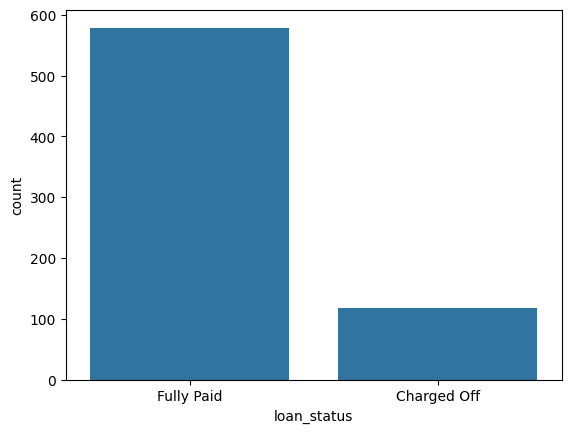

In [25]:
sns.countplot(x='loan_status', data=df[df['pub_rec_bankruptcies'].isnull()])

In [26]:
loan_df.dropna(axis=0, inplace=True)

In [27]:
df2 = df.copy()
def process_emp_length(df):
    df_new = df.copy()
    #0-1 years inclues: null, None, < 1 year, 1 year
    df_new['emp_length'] = df_new['emp_length'].fillna('0-1 years')
    df_new['emp_length'] = np.where(df_new['emp_length'].isin([np.nan,None,'< 1 year','1 year']),
                                     '0-1 years',df_new['emp_length'])
    #2-4 years inclues: 2 years, 3 years, 4 years
    df_new['emp_length'] = np.where(df_new['emp_length'].isin(['2 years','3 years','4 years']),
                                     '2-4 years',df_new['emp_length'])

    #5-9 years inclues: 5 years, 6 years, 7 years, 8 years, 9 years
    df_new['emp_length'] = np.where(df_new['emp_length'].isin(['5 years','6 years','7 years','8 years','9 years']),
                                     '5-9 years',df_new['emp_length'])
    #10+ years includes 10+ years (no change)
    return df_new


In [28]:
def process_revol_util(df):
    df_new = df.copy()

    df_new['revol_util'] = df_new['revol_util'].fillna(-100)
    df_new['revol_util'] = df_new['revol_util'].apply(lambda x: float(str(x).split('%')[0])/100)
    df_new['revol_util'] = np.where(df_new['revol_util']==-1.0,np.nan,df_new['revol_util'])

    return df_new


In [29]:
def process_loan_grades(df):
    df_new = df.copy()

    # turn sub_grade into ordinal mapping
    sorted_subgrades = sorted(df.sub_grade.unique())
    subgrade_dict = dict(zip(sorted_subgrades, range(len(sorted_subgrades))))
    df_new['sub_grade'] = df_new['sub_grade'].map(subgrade_dict)

    # turn grade into ordinal mapping
    sorted_grades = sorted(df.grade.unique())
    grade_dict = dict(zip(sorted_grades, range(len(sorted_grades))))
    df_new['grade'] = df_new['grade'].map(grade_dict)
    return df_new


In [30]:

def process_loan_cols(df):
    df_processed = process_emp_length(df)
    df_processed = process_revol_util(df_processed)
    df_processed = process_loan_grades(df_processed)

    #process int_rate, zip_code, credit_line_age
    df_processed['int_rate'] = df_processed['int_rate'].apply(lambda x: float(str(x).split('%')[0])/100)
    df_processed['zip_code'] = df_processed['zip_code'].apply(lambda x: x[:3])

    # generate new column for outcome variable ('fully_paid'); drop 'loan_status'
    df_processed['fully_paid'] = df_processed['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
    df_processed = df_processed.drop(columns='loan_status')

    return df_processed

loan_df = process_loan_cols(loan_df)


In [92]:

def durbin_watson_test(y_true,y_pred):

    residuals = y_true-y_pred
    durbin_watson_statistic = durbin_watson(residuals)
    print(f"Durbin-Watson statistic: {durbin_watson_statistic:.4f}")
    return durbin_watson_statistic

def jb_test(y_true,y_pred):
    residuals = y_true - y_pred
    jb_test = jarque_bera(residuals)
    print(f"Jarque-Bera test for normality of residuals: JB = {jb_test.statistic:.4f}, p-value = {jb_test.pvalue:.4f}")

    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, stat='density', color='red', linewidth=0)
    plt.title('Probability Density Function of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    if jb_test.pvalue < 0.05:
        result = 1
    else:
        result = 0
    return result


In [44]:
def calculate_vif_and_correlation_dataframe(df):
    # VIF calculation
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
    # Heatmap of Correlation amongst features
    plt.figure(figsize=(40, 40))
    sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
    plt.title("Correlation Heatmap")
    plt.show()
    return vif_data

In [45]:
def calculate_vif_and_correlation(df):
    # VIF calculation
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_data = vif_data.sort_values(by = 'VIF', ascending = False)
    # Heatmap of Correlation amongst features
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
    plt.title("Correlation Heatmap")
    plt.show()
    return vif_data

In [31]:
loan_df

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           5000         5000           4975.0   36 months    0.1065   
1           2500         2500           2500.0   60 months    0.1527   
2           2400         2400           2400.0   36 months    0.1596   
3          10000        10000          10000.0   36 months    0.1349   
5           5000         5000           5000.0   36 months    0.0790   
...          ...          ...              ...         ...       ...   
39562       4800         4800           1100.0   36 months    0.1028   
39573       7000         7000           1000.0   36 months    0.1059   
39623       9000         9000            700.0   36 months    0.1249   
39666      15450        15450            600.0   36 months    0.1122   
39680       3000         3000            525.0   36 months    0.1186   

       installment  grade  sub_grade emp_length home_ownership  annual_inc  \
0           162.87      1          6  10+ years           RENT     24000.0   
1            59.83      2         13  0-1 years           RENT     30000.0   
2            84.33      2         14  10+ years           RENT     12252.0   
3           339.31      2         10  10+ years           RENT     49200.0   
5           156.46      0          3  2-4 years           RENT     36000.0   
...            ...    ...        ...        ...            ...         ...   
39562       155.52      2         10  0-1 years           RENT     35000.0   
39573       227.82      2         11  2-4 years       MORTGAGE     63500.0   
39623       301.04      3         17  5-9 years       MORTGAGE     39000.0   
39666       507.46      2         13  2-4 years       MORTGAGE     40000.0   
39680        99.44      3         15  2-4 years       MORTGAGE     36153.0   

      verification_status issue_d             purpose zip_code addr_state  \
0                Verified  Dec-11         credit_card      860         AZ   
1         Source Verified  Dec-11                 car      309         GA   
2            Not Verified  Dec-11      small_business      606         IL   
3         Source Verified  Dec-11               other      917         CA   
5         Source Verified  Dec-11             wedding      852         AZ   
...                   ...     ...                 ...      ...        ...   
39562        Not Verified  Nov-07  debt_consolidation      226         VA   
39573        Not Verified  Nov-07  debt_consolidation      853         AZ   
39623        Not Verified  Oct-07  debt_consolidation      207         MD   
39666        Not Verified  Aug-07  debt_consolidation      201         VA   
39680        Not Verified  Aug-07  debt_consolidation      479         IN   

         dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0      27.65            0           Jan-85               1   
1       1.00            0           Apr-99               5   
2       8.72            0           Nov-01               2   
3      20.00            0           Feb-96               1   
5      11.20            0           Nov-04               3   
...      ...          ...              ...             ...   
39562   7.51            0           Mar-00               0   
39573   8.50            0           Feb-89               1   
39623   5.08            0           Aug-97               3   
39666  13.50            0           Nov-92               3   
39680   7.47            0           Jul-00               2   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                       121.0                   130.0         3        0   
1                       121.0                   130.0         3        0   
2                       121.0                   130.0         2        0   
3                        35.0                   130.0        10        0   
5                       121.0                   130.0         9        0   
...                       ...                     ...       ...      ...   
395

In [32]:
# term column can be converted to numerical column
loan_df['issue_d_month'] = loan_df['issue_d'].str.split('-').str[0]
loan_df['issue_d_year'] = loan_df['issue_d'].str.split('-').str[1].astype(int)

loan_df['last_credit_pull_d_month'] = loan_df['last_credit_pull_d'].str.split('-').str[0]
loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].str.split('-').str[1].astype(int)
del loan_df['last_credit_pull_d']

loan_df['last_pymnt_d_month'] = loan_df['last_pymnt_d'].str.split('-').str[0]
loan_df['last_pymnt_d_year'] = loan_df['last_pymnt_d'].str.split('-').str[1].astype(int)
del loan_df['last_pymnt_d']

loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].str.split('-').str[0]
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].str.split('-').str[1].astype(int)
del loan_df['earliest_cr_line']

loan_df['issue_d_year'] = '20' + loan_df['issue_d_year'].astype('str')
loan_df['issue_d_year'] = loan_df['issue_d_year'].astype('int')

columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti',
          'revol_bal',  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
loan_df[columns] = loan_df[columns].astype(float)

In [33]:
loan_df

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0         5000.0       5000.0           4975.0   36 months    0.1065   
1         2500.0       2500.0           2500.0   60 months    0.1527   
2         2400.0       2400.0           2400.0   36 months    0.1596   
3        10000.0      10000.0          10000.0   36 months    0.1349   
5         5000.0       5000.0           5000.0   36 months    0.0790   
...          ...          ...              ...         ...       ...   
39562     4800.0       4800.0           1100.0   36 months    0.1028   
39573     7000.0       7000.0           1000.0   36 months    0.1059   
39623     9000.0       9000.0            700.0   36 months    0.1249   
39666    15450.0      15450.0            600.0   36 months    0.1122   
39680     3000.0       3000.0            525.0   36 months    0.1186   

       installment  grade  sub_grade emp_length home_ownership  annual_inc  \
0           162.87      1          6  10+ years           RENT     24000.0   
1            59.83      2         13  0-1 years           RENT     30000.0   
2            84.33      2         14  10+ years           RENT     12252.0   
3           339.31      2         10  10+ years           RENT     49200.0   
5           156.46      0          3  2-4 years           RENT     36000.0   
...            ...    ...        ...        ...            ...         ...   
39562       155.52      2         10  0-1 years           RENT     35000.0   
39573       227.82      2         11  2-4 years       MORTGAGE     63500.0   
39623       301.04      3         17  5-9 years       MORTGAGE     39000.0   
39666       507.46      2         13  2-4 years       MORTGAGE     40000.0   
39680        99.44      3         15  2-4 years       MORTGAGE     36153.0   

      verification_status issue_d             purpose zip_code addr_state  \
0                Verified  Dec-11         credit_card      860         AZ   
1         Source Verified  Dec-11                 car      309         GA   
2            Not Verified  Dec-11      small_business      606         IL   
3         Source Verified  Dec-11               other      917         CA   
5         Source Verified  Dec-11             wedding      852         AZ   
...                   ...     ...                 ...      ...        ...   
39562        Not Verified  Nov-07  debt_consolidation      226         VA   
39573        Not Verified  Nov-07  debt_consolidation      853         AZ   
39623        Not Verified  Oct-07  debt_consolidation      207         MD   
39666        Not Verified  Aug-07  debt_consolidation      201         VA   
39680        Not Verified  Aug-07  debt_consolidation      479         IN   

         dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0      27.65            0               1                   121.0   
1       1.00            0               5                   121.0   
2       8.72            0               2                   121.0   
3      20.00            0               1                    35.0   
5      11.20            0               3                   121.0   
...      ...          ...             ...                     ...   
39562   7.51            0               0                    52.0   
39573   8.50            0               1                     0.0   
39623   5.08            0               3                    60.0   
39666  13.50            0               3                    54.0   
39680   7.47            0               2                     0.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                       130.0         3        0    13648.0       0.837   
1                       130.0         3        0     1687.0       0.094   
2                       130.0         2        0     2956.0       0.985   
3                       130.0        10        0     5598.0       0.210   
5                       130.0         9        0     7963.0       0.283   
.

In [34]:
loan_df['term_months'] = loan_df['term'].str.rstrip('months').astype('int')
del loan_df['term']

In [35]:
numeric_data = loan_df.select_dtypes(include = [np.number])

categorical_data = loan_df.select_dtypes(exclude = [np.number, object]) # Use object instead of np.object

string_data = loan_df.select_dtypes(include = [object]) # Use object instead of np.object

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 33 numerical , 0 categorical and 11 string features in the training data


<Axes: >

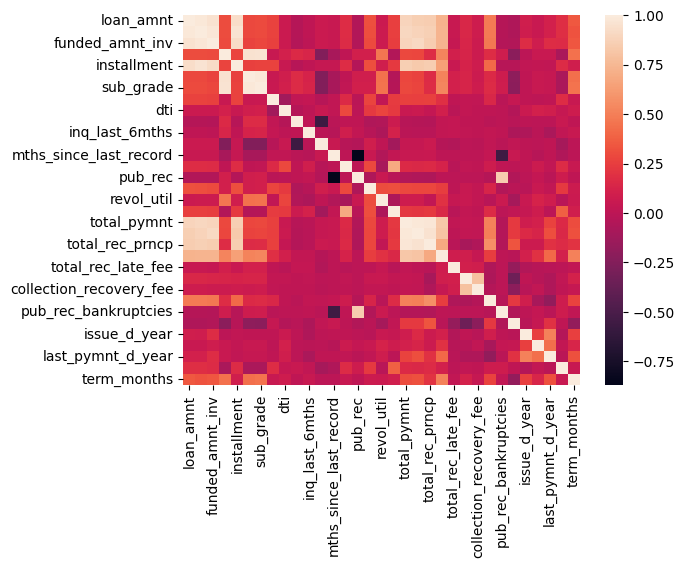

In [36]:
sns.heatmap(numeric_data.corr(),annot=False)

In [37]:
string_data.columns

Index(['emp_length', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'zip_code', 'addr_state', 'issue_d_month',
       'last_credit_pull_d_month', 'last_pymnt_d_month',
       'earliest_cr_line_month'],
      dtype='object')

In [38]:
for i in string_data.columns:
  print(string_data[i].value_counts(dropna = False))

emp_length
2-4 years    11419
5-9 years     9575
10+ years     8359
0-1 years     7384
Name: count, dtype: int64
home_ownership
RENT        17620
MORTGAGE    16321
OWN          2700
OTHER          96
Name: count, dtype: int64
verification_status
Not Verified       15521
Verified           11746
Source Verified     9470
Name: count, dtype: int64
issue_d
Dec-11    1993
Nov-11    1966
Oct-11    1858
Sep-11    1831
Aug-11    1750
Jun-11    1671
Jul-11    1666
May-11    1551
Apr-11    1503
Mar-11    1395
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1095
Jul-10    1090
Oct-10    1080
Sep-10    1056
Aug-10    1053
Jun-10     991
May-10     892
Apr-10     805
Mar-10     716
Feb-10     601
Nov-09     597
Dec-09     595
Jan-10     581
Oct-09     543
Sep-09     445
Aug-09     407
Jul-09     372
Jun-09     353
May-09     319
Apr-09     287
Mar-09     275
Feb-09     259
Jan-09     236
Dec-08     222
Nov-08     183
Apr-08     155
Mar-08     117
Oct-08      96
Jul-08      82
Aug-08      69


In [39]:
loan_df.fully_paid.value_counts()

fully_paid
1    31534
0     5203
Name: count, dtype: int64

In [40]:
loan_df.to_csv('cleaned_data.csv')

### Train-test-split, Scaling and Transformation


In [41]:
X = loan_df.drop(['fully_paid'],axis = 1)
y = loan_df.fully_paid

In [42]:
X

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  grade  \
0         5000.0       5000.0           4975.0    0.1065       162.87      1   
1         2500.0       2500.0           2500.0    0.1527        59.83      2   
2         2400.0       2400.0           2400.0    0.1596        84.33      2   
3        10000.0      10000.0          10000.0    0.1349       339.31      2   
5         5000.0       5000.0           5000.0    0.0790       156.46      0   
...          ...          ...              ...       ...          ...    ...   
39562     4800.0       4800.0           1100.0    0.1028       155.52      2   
39573     7000.0       7000.0           1000.0    0.1059       227.82      2   
39623     9000.0       9000.0            700.0    0.1249       301.04      3   
39666    15450.0      15450.0            600.0    0.1122       507.46      2   
39680     3000.0       3000.0            525.0    0.1186        99.44      3   

       sub_grade emp_length home_ownership  annual_inc verification_status  \
0              6  10+ years           RENT     24000.0            Verified   
1             13  0-1 years           RENT     30000.0     Source Verified   
2             14  10+ years           RENT     12252.0        Not Verified   
3             10  10+ years           RENT     49200.0     Source Verified   
5              3  2-4 years           RENT     36000.0     Source Verified   
...          ...        ...            ...         ...                 ...   
39562         10  0-1 years           RENT     35000.0        Not Verified   
39573         11  2-4 years       MORTGAGE     63500.0        Not Verified   
39623         17  5-9 years       MORTGAGE     39000.0        Not Verified   
39666         13  2-4 years       MORTGAGE     40000.0        Not Verified   
39680         15  2-4 years       MORTGAGE     36153.0        Not Verified   

      issue_d             purpose zip_code addr_state    dti  delinq_2yrs  \
0      Dec-11         credit_card      860         AZ  27.65            0   
1      Dec-11                 car      309         GA   1.00            0   
2      Dec-11      small_business      606         IL   8.72            0   
3      Dec-11               other      917         CA  20.00            0   
5      Dec-11             wedding      852         AZ  11.20            0   
...       ...                 ...      ...        ...    ...          ...   
39562  Nov-07  debt_consolidation      226         VA   7.51            0   
39573  Nov-07  debt_consolidation      853         AZ   8.50            0   
39623  Oct-07  debt_consolidation      207         MD   5.08            0   
39666  Aug-07  debt_consolidation      201         VA  13.50            0   
39680  Aug-07  debt_consolidation      479         IN   7.47            0   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
0                   1                   121.0                   130.0   
1                   5                   121.0                   130.0   
2                   2                   121.0                   130.0   
3                   1                    35.0                   130.0   
5                   3                   121.0                   130.0   
...               ...                     ...                     ...   
39562               0                    52.0                   114.0   
39573               1                     0.0                   113.0   
39623               3                    60.0                   117.0   
39666               3                    54.0                   111.0   
39680               2                     0.0                    61.0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc   total_pymnt  \
0             3        0    13648.0       0.837          9   5863.155187   
1             3        0     1687.0       0.094          4   1008.710000   
2             2        0     2956.0       0.985         10   3005.666844   
3  

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split into 80% train+val and 20% test

# Further split train_val into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [47]:
X_train

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  grade  \
7046     20000.0      20000.0     19975.000000    0.1527       478.64      2   
36449    11250.0      11250.0      8815.592354    0.1221       374.80      1   
38227    10000.0      10000.0      5548.706559    0.0907       318.33      0   
4441     35000.0      35000.0     34975.000000    0.2206       967.86      5   
31855    20000.0      20000.0     20000.000000    0.1682       711.24      4   
...          ...          ...              ...       ...          ...    ...   
25933     4000.0       4000.0      3946.224158    0.0788       125.13      0   
34148     1200.0       1200.0      1200.000000    0.0740        37.28      0   
32910     6000.0       6000.0      5975.000000    0.0894       190.63      0   
23965    23500.0      14300.0     14275.000000    0.0691       440.96      0   
37912     5000.0       5000.0      4704.824900    0.1411       171.15      3   

       sub_grade emp_length home_ownership  annual_inc verification_status  \
7046          13  5-9 years       MORTGAGE    102000.0     Source Verified   
36449          9  10+ years       MORTGAGE     69996.0            Verified   
38227          3  2-4 years       MORTGAGE     50000.0        Not Verified   
4441          28  10+ years           RENT    120000.0            Verified   
31855         21  0-1 years           RENT     70000.0        Not Verified   
...          ...        ...            ...         ...                 ...   
25933          4  10+ years            OWN    140000.0            Verified   
34148          1  10+ years       MORTGAGE     60000.0        Not Verified   
32910          4  5-9 years            OWN     32560.0        Not Verified   
23965          4  2-4 years       MORTGAGE     70000.0            Verified   
37912         15  0-1 years           RENT     45996.0        Not Verified   

      issue_d             purpose zip_code addr_state    dti  delinq_2yrs  \
7046   Sep-11  debt_consolidation      598         MT  12.76            0   
36449  Jun-09  debt_consolidation      150         PA  19.01            0   
38227  Nov-08  debt_consolidation      641         MO   9.62            0   
4441   Nov-11  debt_consolidation      193         PA  16.82            0   
31855  Mar-10  debt_consolidation      941         CA  10.54            0   
...       ...                 ...      ...        ...    ...          ...   
25933  Sep-10      small_business      648         MO  11.15            0   
34148  Nov-09      major_purchase      199         DE   6.80            0   
32910  Jan-10    home_improvement      539         WI  11.24            0   
23965  Nov-10      small_business      983         WA  19.78            0   
37912  Jan-09  debt_consolidation      207         MD  12.11            1   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
7046                6                    28.0                   130.0   
36449               1                   121.0                   130.0   
38227               0                   121.0                   130.0   
4441                2                   121.0                   130.0   
31855               0                    41.0                   130.0   
...               ...                     ...                     ...   
25933               1                   121.0                   130.0   
34148               2                   121.0                   130.0   
32910               1                   121.0                   110.0   
23965               2                   121.0                   130.0   
37912               0                    19.0                   130.0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc   total_pymnt  \
7046          6        0     7638.0       0.813         22  25588.878640   
36449        10        0    16842.0       0.818         22  13492.452030   
38227         7        0    18917.0       0.332         18  11424.147180   
444

In [48]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)


X_train_enc = ordinal_encoder.fit_transform(X_train[string_data.columns])

# Get maximum encoded values from training data
max_encoded_values = X_train_enc.max(axis=0)

# Transform test and validation data using the fitted encoder
X_test_enc = ordinal_encoder.transform(X_test[string_data.columns])
X_val_enc = ordinal_encoder.transform(X_val[string_data.columns])

# To assign the new sub-categories that occur in the test dataframe which are not in training dataframe
for i, col in enumerate(string_data.columns):
    # Determine unknown_value as column-wise max_encoded_value + 1 for the first new subclass and incrementally for subsequent new subclasses
    current_max_encoded_value = int(max_encoded_values[i])

    # Replace unknown categories in test data with progressive values starting from 10
    X_test_enc[:, i][X_test_enc[:, i] == -1] = current_max_encoded_value + 1

    # Update max_encoded_values to reflect the new maximum encoded value encountered in test data
    max_encoded_values[i] = current_max_encoded_value + 1


In [49]:
X_train_enc

array([[3., 0., 1., ..., 2., 2., 4.],
       [1., 0., 2., ..., 8., 6., 9.],
       [2., 0., 0., ..., 8., 6., 4.],
       ...,
       [3., 2., 0., ..., 7., 3., 9.],
       [2., 0., 2., ..., 8., 2., 3.],
       [0., 3., 0., ..., 4., 4., 5.]])

In [50]:
X_test_enc

array([[ 3.,  2.,  0., ...,  5.,  7., 10.],
       [ 2.,  3.,  1., ...,  8., 10.,  1.],
       [ 1.,  3.,  0., ...,  3.,  3.,  1.],
       ...,
       [ 1.,  0.,  0., ...,  7.,  7.,  9.],
       [ 1.,  0.,  2., ...,  3.,  6.,  3.],
       [ 2.,  3.,  1., ...,  1.,  1., 10.]])

In [65]:
MissingDataPercentage_num = (X_train[numeric_data.columns.drop(['fully_paid'])]).isnull().sum()*100/len(df)
MissingDataDF_num = pd.DataFrame({'column_name': numeric_data.columns.drop(['fully_paid']), 'MissingDataInPercentage': MissingDataPercentage_num})
MissingDataDF_num.sort_values('MissingDataInPercentage', inplace=True, ascending=False)
MissingDataDF_num

column_name  MissingDataInPercentage
loan_amnt                              loan_amnt                      0.0
funded_amnt                          funded_amnt                      0.0
earliest_cr_line_year      earliest_cr_line_year                      0.0
last_pymnt_d_year              last_pymnt_d_year                      0.0
last_credit_pull_d_year  last_credit_pull_d_year                      0.0
issue_d_year                        issue_d_year                      0.0
pub_rec_bankruptcies        pub_rec_bankruptcies                      0.0
last_pymnt_amnt                  last_pymnt_amnt                      0.0
collection_recovery_fee  collection_recovery_fee                      0.0
recoveries                            recoveries                      0.0
total_rec_late_fee            total_rec_late_fee                      0.0
total_rec_int                      total_rec_int                      0.0
total_rec_prncp                  total_rec_prncp                      0.0
total_pymnt_inv                  total_pymnt_inv                      0.0
total_pymnt                          total_pymnt                      0.0
total_acc                              total_acc                      0.0
revol_util                            revol_util                      0.0
revol_bal                              revol_bal                      0.0
pub_rec                                  pub_rec                      0.0
open_acc                                open_acc                      0.0
mths_since_last_record    mths_since_last_record                      0.0
mths_since_last_delinq    mths_since_last_delinq                      0.0
inq_last_6mths                    inq_last_6mths                      0.0
delinq_2yrs                          delinq_2yrs                      0.0
dti                                          dti                      0.0
annual_inc                            annual_inc                      0.0
sub_grade                              sub_grade                      0.0
grade                                      grade                      0.0
installment                          installment                      0.0
int_rate                                int_rate                      0.0
funded_amnt_inv                  funded_amnt_inv                      0.0
term_months                          term_months                      0.0

In [66]:
MissingDataPercentage_num = (X_test[numeric_data.columns.drop(['fully_paid'])]).isnull().sum()*100/len(df)
MissingDataDF_num = pd.DataFrame({'column_name': numeric_data.columns.drop(['fully_paid']), 'MissingDataInPercentage': MissingDataPercentage_num})
MissingDataDF_num.sort_values('MissingDataInPercentage', inplace=True, ascending=False)
MissingDataDF_num

column_name  MissingDataInPercentage
loan_amnt                              loan_amnt                      0.0
funded_amnt                          funded_amnt                      0.0
earliest_cr_line_year      earliest_cr_line_year                      0.0
last_pymnt_d_year              last_pymnt_d_year                      0.0
last_credit_pull_d_year  last_credit_pull_d_year                      0.0
issue_d_year                        issue_d_year                      0.0
pub_rec_bankruptcies        pub_rec_bankruptcies                      0.0
last_pymnt_amnt                  last_pymnt_amnt                      0.0
collection_recovery_fee  collection_recovery_fee                      0.0
recoveries                            recoveries                      0.0
total_rec_late_fee            total_rec_late_fee                      0.0
total_rec_int                      total_rec_int                      0.0
total_rec_prncp                  total_rec_prncp                      0.0
total_pymnt_inv                  total_pymnt_inv                      0.0
total_pymnt                          total_pymnt                      0.0
total_acc                              total_acc                      0.0
revol_util                            revol_util                      0.0
revol_bal                              revol_bal                      0.0
pub_rec                                  pub_rec                      0.0
open_acc                                open_acc                      0.0
mths_since_last_record    mths_since_last_record                      0.0
mths_since_last_delinq    mths_since_last_delinq                      0.0
inq_last_6mths                    inq_last_6mths                      0.0
delinq_2yrs                          delinq_2yrs                      0.0
dti                                          dti                      0.0
annual_inc                            annual_inc                      0.0
sub_grade                              sub_grade                      0.0
grade                                      grade                      0.0
installment                          installment                      0.0
int_rate                                int_rate                      0.0
funded_amnt_inv                  funded_amnt_inv                      0.0
term_months                          term_months                      0.0

In [67]:
rs = RobustScaler()
X_train_scaled  = rs.fit_transform(X_train[numeric_data.columns.drop(['fully_paid'])])
X_test_scaled = rs.transform(X_test[numeric_data.columns.drop(['fully_paid'])])
X_val_scaled = rs.transform(X_val[numeric_data.columns.drop(['fully_paid'])])

In [68]:
X_train_scaled

array([[ 1.05263158,  1.09473684,  1.17066667, ...,  0.        ,
         0.05434783,  1.        ],
       [ 0.13157895,  0.17368421, -0.01967015, ..., -0.5       ,
         0.06521739,  0.        ],
       [ 0.        ,  0.04210526, -0.36813797, ..., -1.        ,
         0.0326087 ,  0.        ],
       ...,
       [-0.42105263, -0.37894737, -0.32266667, ...,  0.        ,
         0.10869565,  0.        ],
       [ 1.42105263,  0.49473684,  0.56266667, ..., -1.        ,
         0.10869565,  0.        ],
       [-0.52631579, -0.48421053, -0.45815201, ..., -0.5       ,
        -0.95652174,  0.        ]])

In [69]:
# Convert NumPy arrays to Pandas DataFrames before concatenation
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
X_train_enc_df = pd.DataFrame(X_train_enc)
X_test_enc_df = pd.DataFrame(X_test_enc)
X_val_enc_df = pd.DataFrame(X_val_enc)
X_val_scaled_df = pd.DataFrame(X_val_scaled)

# Concatenating the dataframes along the columns (axis =1)
X_train_final = pd.concat([X_train_scaled_df, X_train_enc_df],  axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_enc_df], axis=1)

X_val_final = pd.concat([X_val_scaled_df, X_val_enc_df], axis=1)

In [70]:
cols =  list(numeric_data.columns)+list(string_data.columns)
cols.remove('fully_paid') # Remove 'fully_paid' directly from the list
X_train_final.columns = cols
X_test_final.columns = cols
X_val_final.columns = cols

In [71]:
X_train_final

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  grade  \
0       1.052632     1.094737         1.170667  0.644612     0.758042    0.5   
1       0.131579     0.173684        -0.019670  0.066163     0.360371    0.0   
2       0.000000     0.042105        -0.368138 -0.527410     0.144110   -0.5   
3       2.631579     2.673684         2.770667  1.928166     2.631587    2.0   
4       1.052632     1.094737         1.173333  0.937618     1.648820    1.5   
...          ...          ...              ...       ...          ...    ...   
22036  -0.631579    -0.589474        -0.539069 -0.752363    -0.595780   -0.5   
22037  -0.926316    -0.884211        -0.832000 -0.843100    -0.932215   -0.5   
22038  -0.421053    -0.378947        -0.322667 -0.551985    -0.344937   -0.5   
22039   1.421053     0.494737         0.562667 -0.935728     0.613741   -0.5   
22040  -0.526316    -0.484211        -0.458152  0.425331    -0.419539    1.0   

       sub_grade  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0            0.4    0.983146 -0.062500          0.0             5.0   
1            0.0    0.233989  0.547852          0.0             0.0   
2           -0.6   -0.234082 -0.369141          0.0            -1.0   
3            1.9    1.404494  0.333984          0.0             1.0   
4            1.2    0.234082 -0.279297          0.0            -1.0   
...          ...         ...       ...          ...             ...   
22036       -0.5    1.872659 -0.219727          0.0             0.0   
22037       -0.8    0.000000 -0.644531          0.0             1.0   
22038       -0.5   -0.642322 -0.210937          0.0             0.0   
22039       -0.5    0.234082  0.623047          0.0             1.0   
22040        0.6   -0.327809 -0.125977          1.0            -1.0   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                   -1.309859                     0.0 -0.500000      0.0   
1                    0.000000                     0.0  0.166667      0.0   
2                    0.000000                     0.0 -0.333333      0.0   
3                    0.000000                     0.0  0.833333      0.0   
4                   -1.126761                     0.0 -0.833333      0.0   
...                       ...                     ...       ...      ...   
22036                0.000000                     0.0 -0.166667      0.0   
22037                0.000000                     0.0 -0.166667      0.0   
22038                0.000000                   -20.0  0.166667      1.0   
22039                0.000000                     0.0  0.166667      0.0   
22040               -1.436620                     0.0  0.333333      0.0   

       revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0      -0.097750    0.672340   0.133333     1.459142         1.548390   
1       0.594853    0.682979   0.133333     0.339206         0.086620   
2       0.750997   -0.351064  -0.133333     0.147714        -0.295489   
3       4.426518    0.668085   0.933333     2.797088         2.930886   
4       0.823388    1.025532  -0.333333     1.457968         1.550237   
...          ...         ...        ...          ...              ...   
22036   0.952592   -0.021277   0.600000    -0.492903        -0.471398   
22037   2.146286   -0.919149   1.600000    -0.784674        -0.766534   
22038  -0.400181   -0.831915   0.466667    -0.274559        -0.242293   
22039   0.073670    0.221277   0.266667    -0.379398        -0.348820   
22040   0.119347    0.172340  -0.333333    -0.339557        -0.345187   

       total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0             1.356619       2.036266                0.00        0.00   
1             0.367418       0.432010                0.00        0.00   
2             0.226103       0.039723                0.00        0.00   
3             1.084514       8.545089               48.39     3232.45   
4             1.356618       2.030192 

In [72]:
X_val_final

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  grade  \
0     -0.736842    -0.694737        -0.640000 -0.164461    -0.698874    0.0   
1      0.526316     0.568421         0.586667 -0.069943     0.188113    0.0   
2      0.526316     0.568421         0.640000  0.308129     0.246553    0.5   
3      1.473684     1.515789         1.192104  0.155009     1.001302    0.5   
4      0.210526     0.252632         0.320000 -0.211720    -0.081725    0.0   
...         ...          ...              ...       ...          ...    ...   
7343  -0.210526    -0.168421        -0.109333 -1.102079    -0.142502   -0.5   
7344  -0.589474    -0.547368        -0.490667  0.928166    -0.476141    1.0   
7345   0.105263     0.147368         0.164312 -0.551985     0.263442   -0.5   
7346  -0.673684    -0.631579        -0.576000 -0.933837    -0.649778   -0.5   
7347  -0.526316    -0.484211        -0.426667 -0.822306    -0.479243   -0.5   

      sub_grade  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0          -0.2    0.117041 -0.737305          0.0            -1.0   
1          -0.1    0.585206  0.694336          0.0            -1.0   
2           0.1    0.468165 -0.000977          0.0             0.0   
3           0.1    0.257491  0.196289          0.0            -1.0   
4          -0.1   -0.686002  0.944336          0.0            -1.0   
...         ...         ...       ...          ...             ...   
7343       -0.9   -0.585206  0.774414          0.0            -1.0   
7344        0.7   -0.117041  0.645508          0.0            -1.0   
7345       -0.5    1.310861 -0.611328          0.0            -1.0   
7346       -0.7   -0.280899  0.349609          0.0             0.0   
7347       -0.6   -0.234082 -1.273437          0.0             0.0   

      mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                        0.0                     0.0 -0.666667      0.0   
1                        0.0                     0.0  2.166667      0.0   
2                        0.0                     0.0  0.500000      0.0   
3                        0.0                     0.0  0.833333      0.0   
4                        0.0                     0.0 -0.833333      0.0   
...                      ...                     ...       ...      ...   
7343                     0.0                     0.0 -0.166667      0.0   
7344                     0.0                     0.0 -0.333333      0.0   
7345                     0.0                     0.0  1.833333      0.0   
7346                     0.0                     0.0 -0.666667      0.0   
7347                     0.0                     0.0 -0.833333      0.0   

      revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0     -0.513733   -0.397872  -0.800000    -0.582675        -0.557858   
1      4.398676   -0.644681   1.400000     0.904399         0.915891   
2     -0.095794   -0.506383   0.733333     0.893051         0.966647   
3      1.298668   -0.091489   0.866667     1.852334         1.323294   
4     -0.122432    0.282979  -0.600000     0.461426         0.520755   
...         ...         ...        ...          ...              ...   
7343  -0.066220   -0.363830   0.066667    -0.109435        -0.071559   
7344   1.226578    1.048936  -0.600000    -0.388799        -0.357574   
7345   0.995184   -0.685106   1.866667     0.236700         0.238014   
7346  -0.048536    0.240426   0.266667    -0.574717        -0.549638   
7347  -0.584318   -0.936170  -0.733333    -0.427027        -0.397065   

      total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           -0.565258      -0.386425                 0.0         0.0   
1            0.791361       1.560813                 0.0         0.0   
2            0.791361       1.502054                 0.0         0.0   
3            1.808825       2.154609                 0.0         0.0   
4            0.452206       0.705312                 0.0         0.0   
...               

In [73]:
X_test_final

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  grade  \
0      0.000000     0.042105         0.093333 -0.094518     0.185432    0.0   
1      0.000000     0.042105         0.106667 -0.748582     0.123353   -0.5   
2     -0.294737    -0.252632        -0.192000 -1.147448    -0.238741   -0.5   
3      0.842105     0.884211         0.954667 -0.559546     1.113894   -0.5   
4      0.736842     0.778947        -0.090667  0.245747     1.123621    0.5   
...         ...          ...              ...       ...          ...    ...   
7343  -0.105263    -0.063158        -0.003073 -0.933837    -0.011987   -0.5   
7344  -0.231579    -0.189474        -0.128000  0.236295    -0.066981    0.5   
7345  -0.421053    -0.378947        -0.320000 -0.071834    -0.317402    0.0   
7346   0.526316     0.568421         0.640000  0.506616     0.903454    1.0   
7347  -0.905263    -0.863158        -0.810667  0.710775    -0.887485    1.0   

      sub_grade  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0           0.0    2.411049 -1.188477          0.0            -1.0   
1          -0.6   -0.070225 -0.030273          0.0            -1.0   
2          -0.8   -0.667135 -0.661133          0.0             1.0   
3          -0.5    0.421348 -0.625000          0.0             0.0   
4           0.3   -0.187360  0.338867          0.0            -1.0   
...         ...         ...       ...          ...             ...   
7343       -0.7   -0.538390  0.851562          0.0             0.0   
7344        0.2   -0.421348  0.407227          0.0             0.0   
7345       -0.3    0.008895  0.468750          0.0            -1.0   
7346        0.6    0.351124  0.749023          0.0            -1.0   
7347        0.6   -0.702247 -1.085937          0.0            -1.0   

      mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                   0.000000                     0.0  1.000000      0.0   
1                   0.000000                     0.0  0.666667      0.0   
2                   0.000000                     0.0 -0.500000      0.0   
3                   0.000000                     0.0 -0.500000      0.0   
4                   0.000000                     0.0  0.333333      0.0   
...                      ...                     ...       ...      ...   
7343                0.000000                     0.0 -0.666667      0.0   
7344               -0.577465                     0.0  0.666667      0.0   
7345               -0.591549                     0.0  0.000000      0.0   
7346                0.000000                   -12.0  0.000000      1.0   
7347                0.000000                     0.0 -1.000000      0.0   

      revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0     -0.050117   -0.525532  -0.200000     0.100669         0.135023   
1      0.709384    0.253191   0.666667     0.132740         0.181204   
2     -0.226428   -0.742553  -0.200000    -0.182189        -0.144134   
3      0.664610    0.353191  -0.666667     0.931195         1.000769   
4      0.338024    0.240426   0.866667     0.046582        -0.422319   
...         ...         ...        ...          ...              ...   
7343   0.696967   -0.004255  -0.200000     0.015273         0.056757   
7344   0.059448   -0.302128   0.200000    -0.105505        -0.064916   
7345   3.160358    0.525532   1.066667    -0.256781        -0.221192   
7346   2.001505    0.997872  -0.200000     0.333503         0.388603   
7347  -0.530514    0.687234  -1.066667    -0.746805        -0.727414   

      total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0            0.226103      -0.203872                 0.0        0.00   
1            0.226103      -0.037815                 0.0        0.00   
2           -0.090441      -0.326189                 0.0        0.00   
3            1.130516       0.261384                 0.0        0.00   
4           -0.037631       0.634429                 0.0        0.00   
...               

In [74]:
X_train_final[string_data.columns] = X_train_final[string_data.columns].astype(int)
X_test_final[string_data.columns] = X_test_final[string_data.columns].astype(int)
X_val_final[string_data.columns] = X_val_final[string_data.columns].astype(int)

In [75]:
X_train_final_download = X_train_final.copy()
X_val_final_download = X_val_final.copy()
X_test_final_download = X_test_final.copy()

In [76]:
X_train_final_download['fully_paid'] = y_train
X_val_final_download['fully_paid'] = y_val
X_test_final_download['fully_paid'] = y_test

In [77]:
X_train_final_download.to_csv('Preprocessed_training_set.csv')
X_val_final_download.to_csv('Preprocessed_validation_set.csv')
X_test_final_download.to_csv('Preprocessed_testing_set.csv')


In [78]:
from google.colab import files
files.download('cleaned_data.csv')
files.download('Preprocessed_training_set.csv')
files.download('Preprocessed_validation_set.csv')
files.download('Preprocessed_testing_set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model

In [79]:
import sklearn
import imblearn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from statsmodels.stats.stattools import durbin_watson
from scipy.stats import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Check the balance of the predicted variable ('fully_paid')
loan_df['fully_paid'].value_counts(normalize=True)

fully_paid
1    0.858372
0    0.141628
Name: proportion, dtype: float64

Clearly there is a very high number of variables with loan_status_rank=0, than loan_status_rank=1, which might cause some ambiguities while we are trying to train our classification model.
This type of unbalance can lead to a poor model and hence, to remove this various methods can be used, like:
1. cost sensitive training
2. some penalty function
3. SMOTE

### **Cost Sensitive training for Imbalanced Classification**

Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. It is a field of study that is closely related to the field of imbalanced learning that is concerned with classification on datasets with a skewed class distribution. As such, many conceptualizations and techniques developed and used for cost-sensitive learning can be adopted for imbalanced classification problems. In cost-sensitive learning instead of each instance being either correctly or incorrectly classified, each class (or instance) is given a misclassification cost. Thus, instead of trying to optimize the accuracy, the problem is then to minimize the total misclassification cost.




## SMOTE, Logistic Regression on 44 features obtained after preprocessing

In [81]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter (y_train)
print ('Before', counter)
# oversampLing the train dataset using SMOTE
smt = SMOTE()
X_train_sm2, y_train_sm2 = smt. fit_resample(X_train_final, y_train)
counter = Counter (y_train_sm2)
print('After', counter)

Before Counter({1: 18896, 0: 3145})
After Counter({1: 18896, 0: 18896})


In [82]:
model = LogisticRegression()
model.fit(X_train_sm2, y_train_sm2)

LogisticRegression()

In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score

#### Model metrics on Training set



Accuracy: 95.6808%
Precision: 98.4449%
Recall: 96.4860%
F1-score: 97.4556%


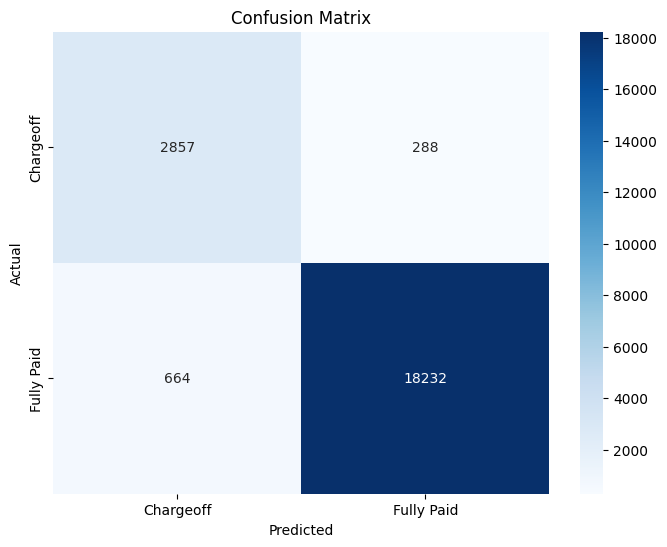


Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      3145
           1       0.98      0.96      0.97     18896

    accuracy                           0.96     22041
   macro avg       0.90      0.94      0.92     22041
weighted avg       0.96      0.96      0.96     22041



In [84]:
y_pred_tr = model.predict(X_train_final)
accuracy_tr = accuracy_score(y_train, y_pred_tr)
f1_score_tr = f1_score(y_train, y_pred_tr)
recall_tr = recall_score(y_train, y_pred_tr)
precision_tr = precision_score(y_train,y_pred_tr)

print("Accuracy: {:.4f}%".format(accuracy_tr * 100))
print("Precision: {:.4f}%".format(precision_tr * 100))
print("Recall: {:.4f}%".format(recall_tr * 100))
print("F1-score: {:.4f}%".format(f1_score_tr * 100))


# evaluate the model
cm = confusion_matrix(y_train,y_pred_tr)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Chargeoff', 'Fully Paid'],
            yticklabels = ['Chargeoff', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report for Training Data:\n", classification_report(y_train, y_pred_tr))

#### Model metrics on Validation set



Accuracy: 95.6042%
Precision: 98.3527%
Recall: 96.4982%
F1-score: 97.4166%


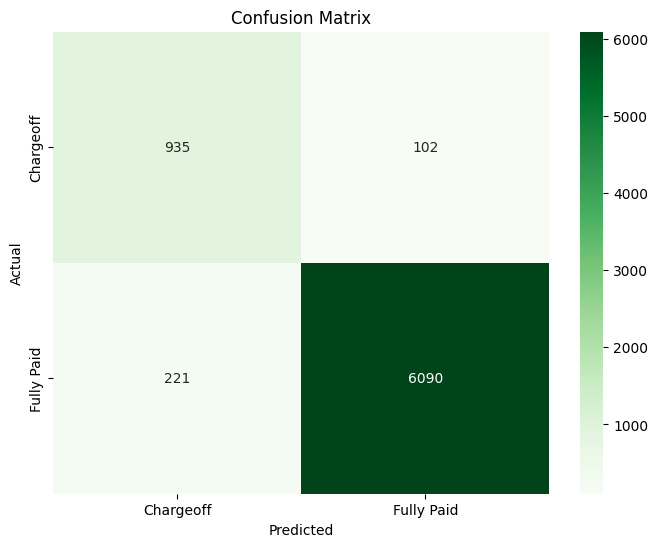


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1037
           1       0.98      0.96      0.97      6311

    accuracy                           0.96      7348
   macro avg       0.90      0.93      0.91      7348
weighted avg       0.96      0.96      0.96      7348



In [85]:
y_pred_val = model.predict(X_val_final)
accuracy_val = accuracy_score(y_val, y_pred_val)
f1_score_val = f1_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
precision_val = precision_score(y_val,y_pred_val)

print("Accuracy: {:.4f}%".format(accuracy_val* 100))
print("Precision: {:.4f}%".format(precision_val * 100))
print("Recall: {:.4f}%".format(recall_val * 100))
print("F1-score: {:.4f}%".format(f1_score_val * 100))


# evaluate the model
cm1 = confusion_matrix(y_val,y_pred_val)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Chargeoff', 'Fully Paid'],
            yticklabels = ['Chargeoff', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_val, y_pred_val))

#### Model metrics on Test set



Accuracy: 95.5362%
Precision: 98.3712%
Recall: 96.4122%
F1-score: 97.3819%


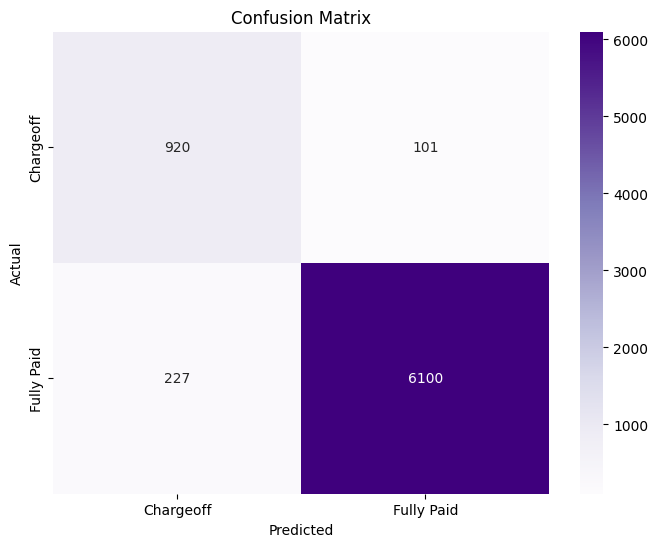


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      1021
           1       0.98      0.96      0.97      6327

    accuracy                           0.96      7348
   macro avg       0.89      0.93      0.91      7348
weighted avg       0.96      0.96      0.96      7348



In [87]:
y_pred_test = model.predict(X_test_final)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test,y_pred_test)

print("Accuracy: {:.4f}%".format(accuracy_test* 100))
print("Precision: {:.4f}%".format(precision_test * 100))
print("Recall: {:.4f}%".format(recall_test * 100))
print("F1-score: {:.4f}%".format(f1_score_test * 100))



# evaluate the model
cm2 = confusion_matrix(y_test,y_pred_test)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Chargeoff', 'Fully Paid'],
            yticklabels = ['Chargeoff', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

### ROC-AUC Curve for Training set

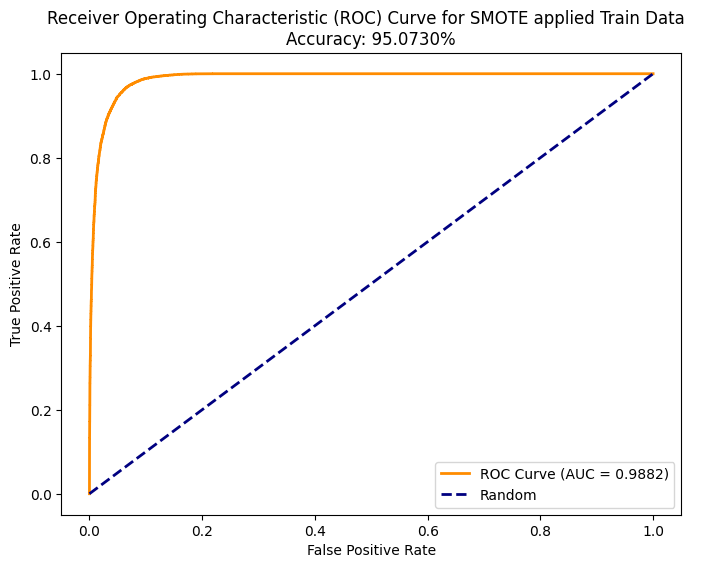

In [145]:
accuracy_tr_sm = accuracy_score(y_train_sm2,model.predict(X_train_sm2))
# Plot ROC Curve
y_prob_tr_sm = model.predict_proba(X_train_sm2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train_sm2, y_prob_tr_sm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SMOTE applied Train Data  \nAccuracy: {:.4f}%'.format(
	accuracy_tr_sm * 100))
plt.legend(loc="lower right")
plt.show()

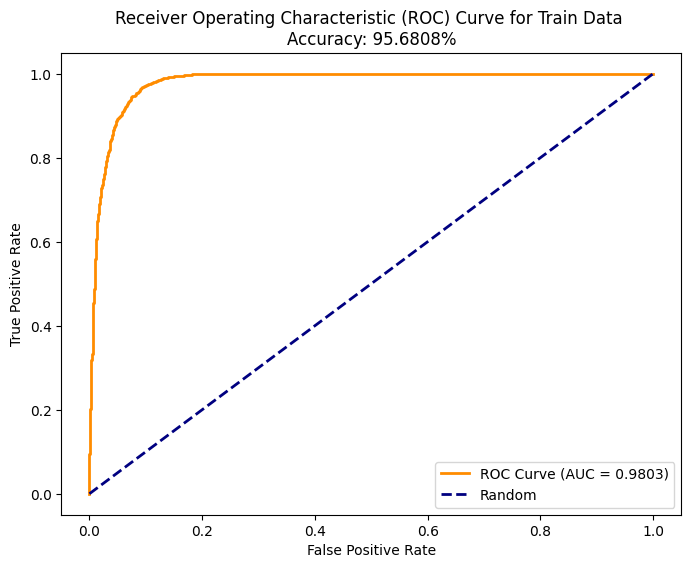

In [88]:
# Plot ROC Curve
y_prob_tr = model.predict_proba(X_train_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_prob_tr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Data \nAccuracy: {:.4f}%'.format(
	accuracy_tr * 100))
plt.legend(loc="lower right")
plt.show()

### ROC-AUC Curve for Test set


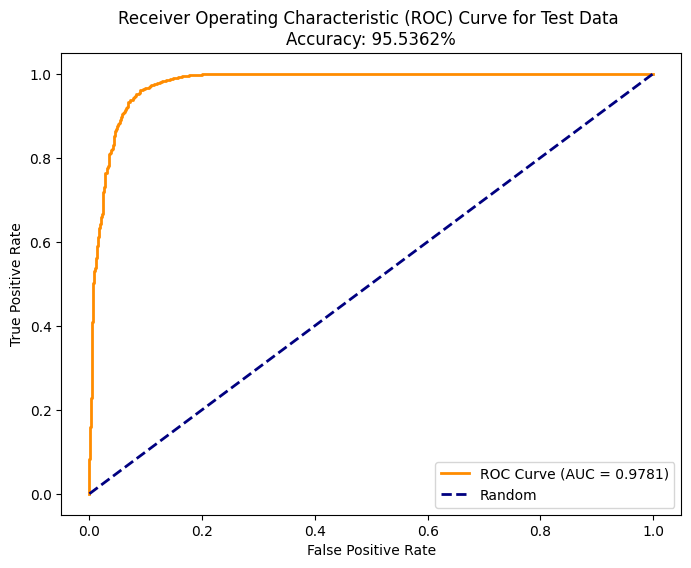

In [89]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Data \nAccuracy: {:.4f}%'.format(
	accuracy_test * 100))
plt.legend(loc="lower right")
plt.show()

Multicollinearity and Residual Analysis for 44 features model

Jarque-Bera test for normality of residuals: JB = 471138.0672, p-value = 0.0000


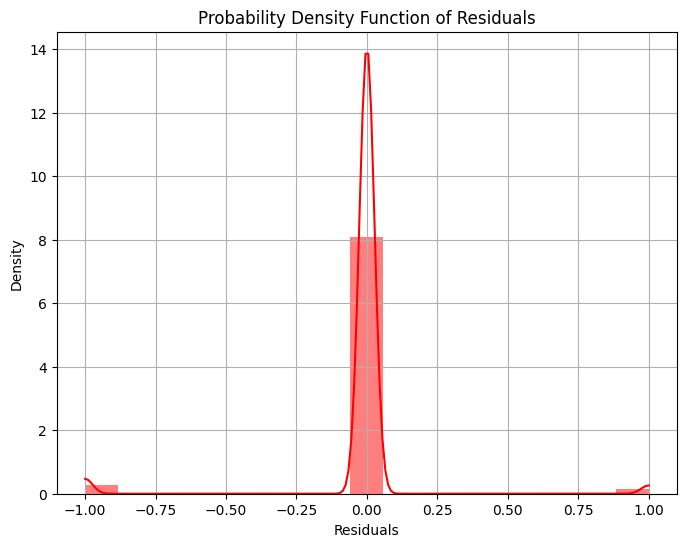

1

In [97]:
jb_test(y_train_sm2,model.predict(X_train_sm2))

In [95]:
durbin_watson_test(y_train_sm2,model.predict(X_train_sm2))

Durbin-Watson statistic: 1.9495


1.949516648764769

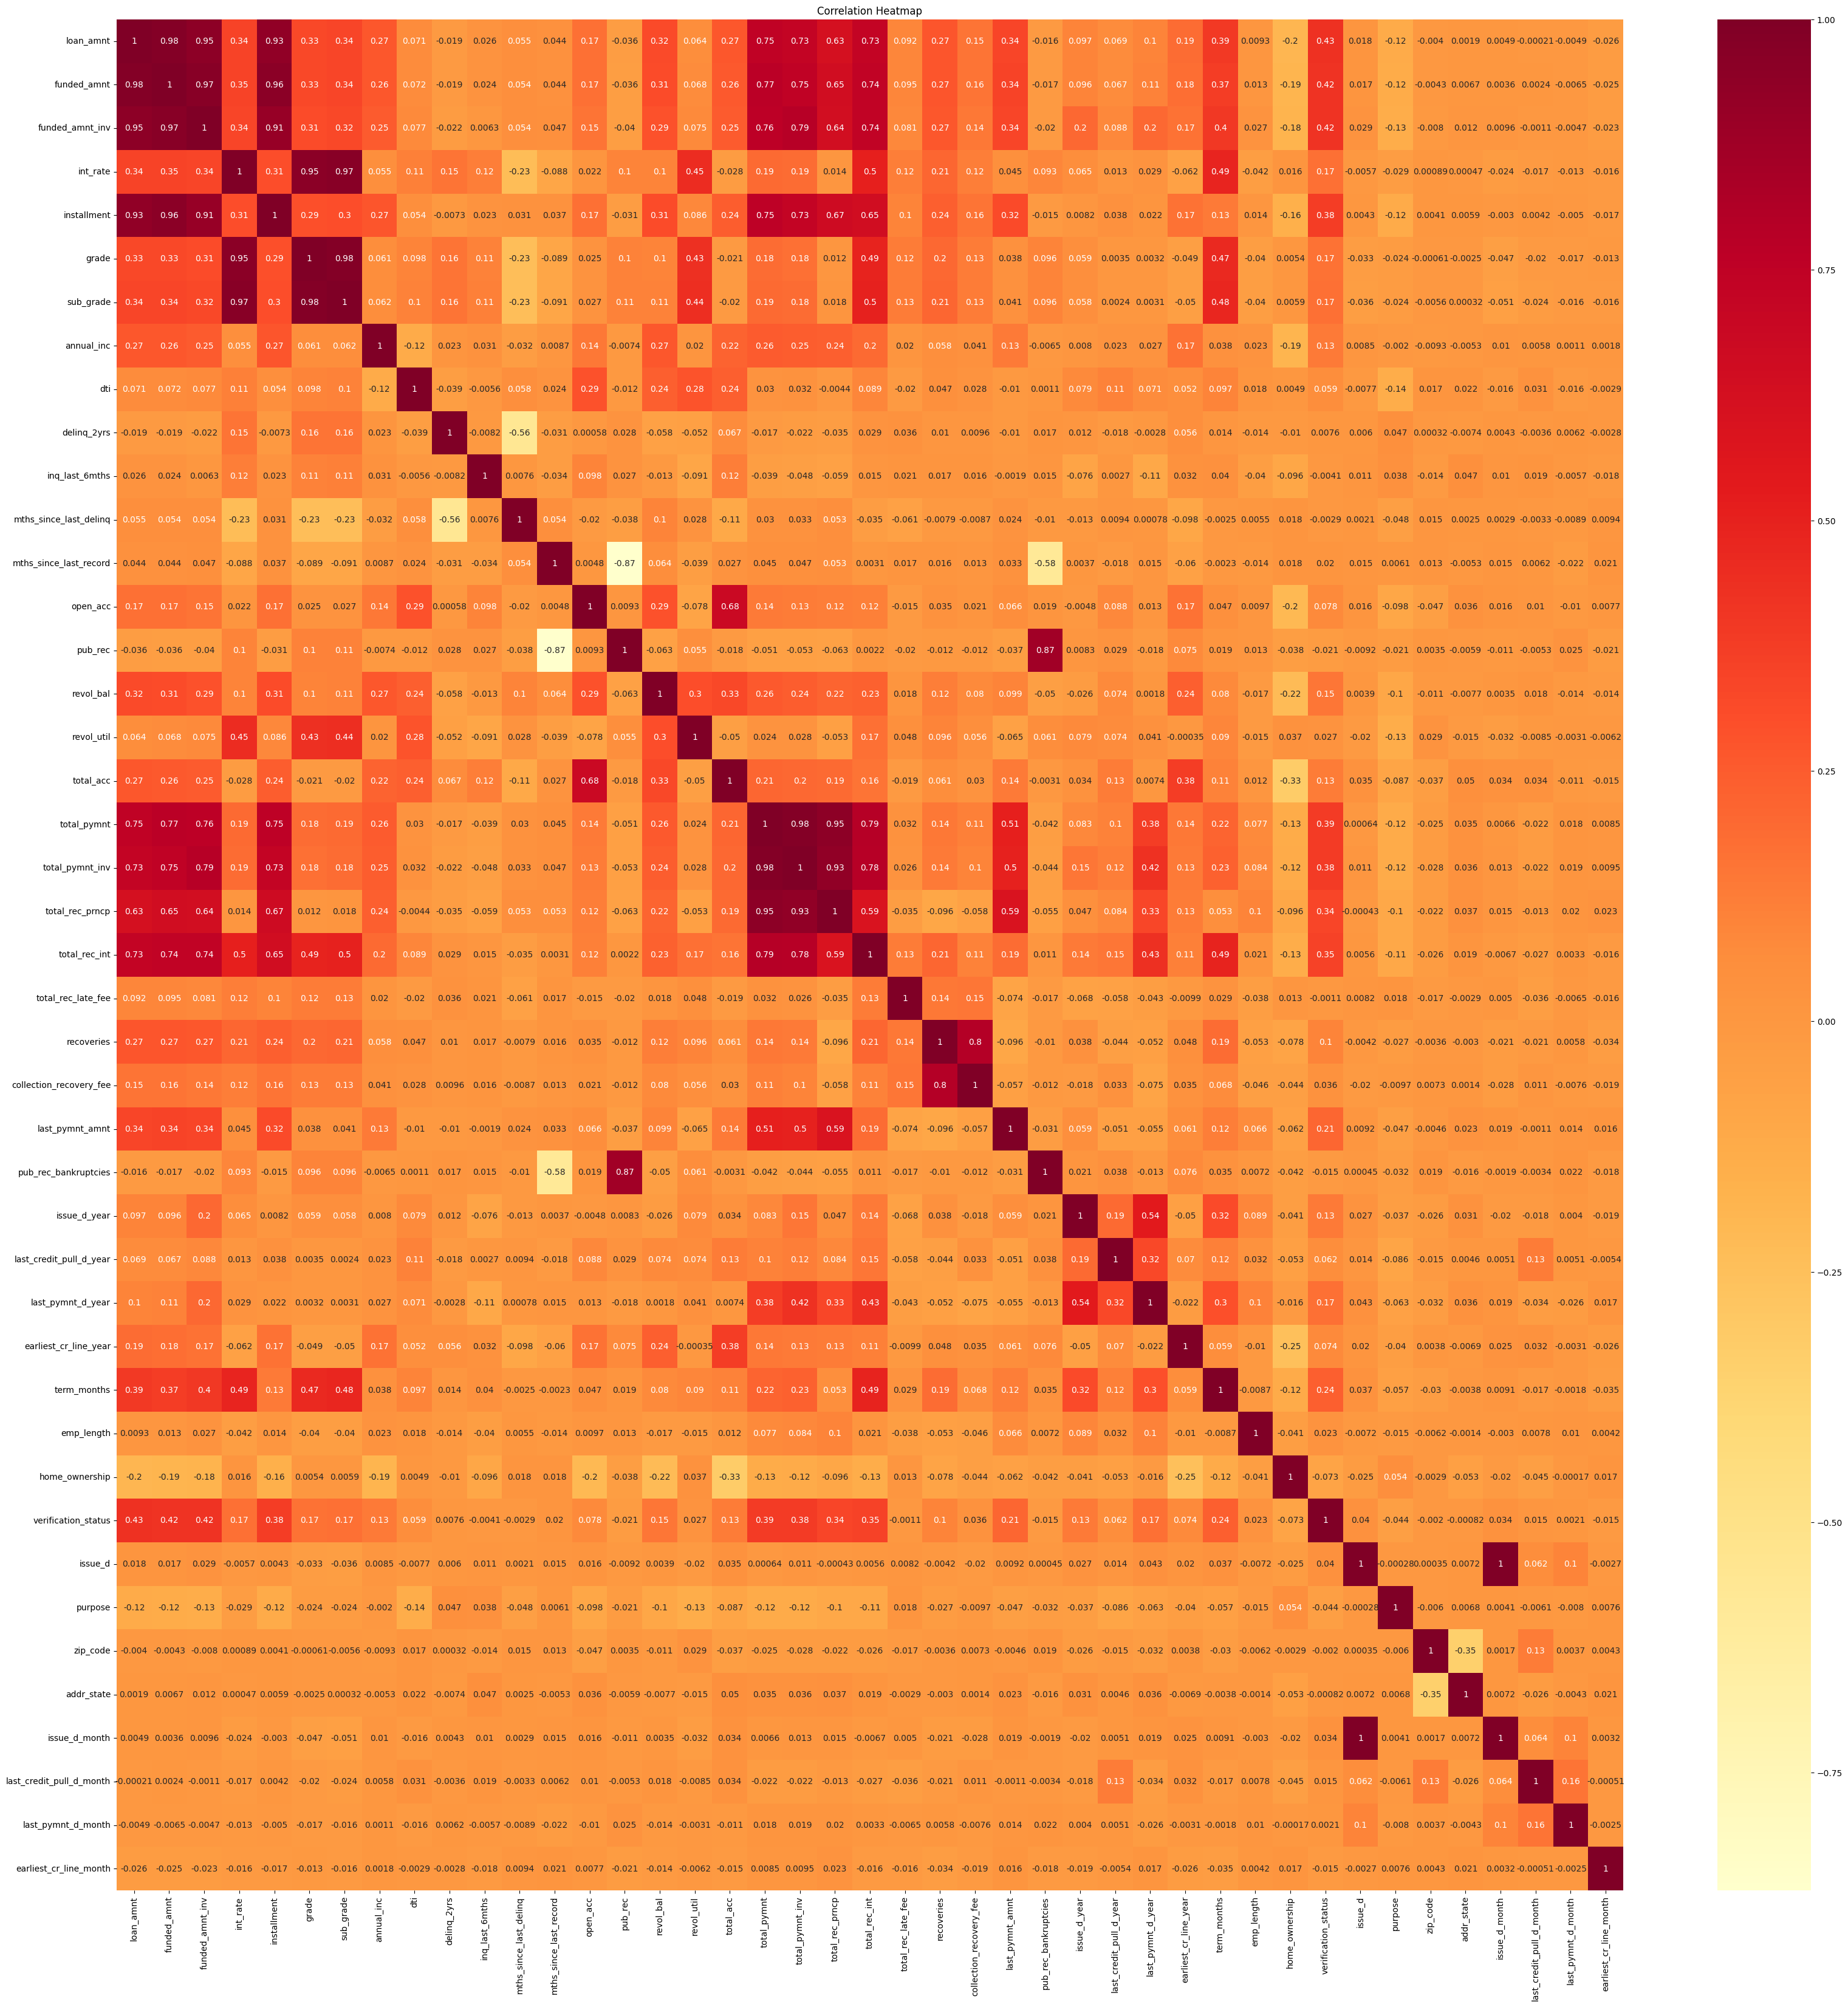

feature           VIF
18               total_pymnt  13607.203571
20           total_rec_prncp   8516.545684
21             total_rec_int   1273.171694
35                   issue_d    742.057773
39             issue_d_month    595.157639
23                recoveries    353.923803
1                funded_amnt    155.372881
19           total_pymnt_inv     93.594679
2            funded_amnt_inv     58.603010
4                installment     55.971523
6                  sub_grade     43.885896
5                      grade     39.826247
0                  loan_amnt     30.935160
14                   pub_rec     25.104856
3                   int_rate     18.681580
31               term_months      9.251635
26      pub_rec_bankruptcies      9.240897
12    mths_since_last_record      8.974914
40  last_credit_pull_d_month      4.634324
37                  zip_code      4.041627
29         last_pymnt_d_year      3.944707
41        last_pymnt_d_month      3.889636
42    earliest_cr_line_month      3.796422
38                addr_state      3.722407
32                emp_length      3.209235
24   collection_recovery_fee      3.187961
25           last_pymnt_amnt      2.792383
33            home_ownership      2.734613
11    mths_since_last_delinq      2.638070
17                 total_acc      2.608017
36                   purpose      2.586223
27              issue_d_year      2.585889
34       verification_status      2.579491
13                  open_acc      2.135402
30     earliest_cr_line_year      2.010144
16                revol_util      1.826307
15                 revol_bal      1.700002
9                delinq_2yrs      1.622647
28   last_credit_pull_d_year      1.472248
8                        dti      1.329227
7                 annual_inc      1.239838
22        total_rec_late_fee      1.177619
10            inq_last_6mths      1.108251

In [96]:
calculate_vif_and_correlation_dataframe(X_train_sm2)

The model predictions are good but we can see the presence of extremely high
multi-collinearity so the model predictions even though appear to be good dont seem to be reliable. We shall proceed with refinements to the model.
Although the model seems to be very low in auto-correlation and the residual probability graph combined with histogram is showing that although the distribition is not Gaussian distributed its peak is at 0 which is a good sign.

## Feature selection using F-statistic (selecting the k-best that is 25-features with the highest F-statistic values) these features capture maximum variability which can be beneficial
---



In [98]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 25 features using F-score
selector_fscore = SelectKBest(score_func=f_classif, k=25)
X_train_fscore_sm = selector_fscore.fit_transform(X_train_sm2, y_train_sm2)

In [99]:
X_train_sm2

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
0       1.052632     1.094737         1.170667  0.644612     0.758042   
1       0.131579     0.173684        -0.019670  0.066163     0.360371   
2       0.000000     0.042105        -0.368138 -0.527410     0.144110   
3       2.631579     2.673684         2.770667  1.928166     2.631587   
4       1.052632     1.094737         1.173333  0.937618     1.648820   
...          ...          ...              ...       ...          ...   
37787   0.513394     0.555499         0.599167  0.039183     0.191158   
37788   0.955506     0.997611         1.073683  0.459876     0.634567   
37789   1.295427     1.285338         1.278239  1.156868     1.052159   
37790   0.070677     0.112782         0.067698 -0.340496     0.284590   
37791   1.569715     1.611821         1.694609  0.381175     1.137971   

          grade  sub_grade  annual_inc       dti  delinq_2yrs  inq_last_6mths  \
0      0.500000   0.400000    0.983146 -0.062500     0.000000        5.000000   
1      0.000000   0.000000    0.233989  0.547852     0.000000        0.000000   
2     -0.500000  -0.600000   -0.234082 -0.369141     0.000000       -1.000000   
3      2.000000   1.900000    1.404494  0.333984     0.000000        1.000000   
4      1.500000   1.200000    0.234082 -0.279297     0.000000       -1.000000   
...         ...        ...         ...       ...          ...             ...   
37787  0.030393   0.024314    0.556748  0.742440     0.000000        0.000000   
37788  0.500000   0.338404    0.216132  0.304883     0.000000       -0.538654   
37789  1.758123   1.474249   -0.414588 -0.169724     0.838749       -0.677498   
37790 -0.046286  -0.091657   -0.423804  0.127618     0.000000        2.000000   
37791  0.513597   0.412238    1.063874  0.287922     0.000000        1.972805   

       mths_since_last_delinq  mths_since_last_record  open_acc   pub_rec  \
0                   -1.309859                0.000000 -0.500000  0.000000   
1                    0.000000                0.000000  0.166667  0.000000   
2                    0.000000                0.000000 -0.333333  0.000000   
3                    0.000000                0.000000  0.833333  0.000000   
4                   -1.126761                0.000000 -0.833333  0.000000   
...                       ...                     ...       ...       ...   
37787               -0.542363                0.000000 -0.636274  0.000000   
37788               -0.279407               -6.920189 -0.294679  0.461346   
37789               -1.393977                0.000000  0.306458  0.000000   
37790               -0.268394                0.000000 -0.379619  0.000000   
37791                0.000000                0.000000  0.187063  0.000000   

       revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0      -0.097750    0.672340   0.133333     1.459142         1.548390   
1       0.594853    0.682979   0.133333     0.339206         0.086620   
2       0.750997   -0.351064  -0.133333     0.147714        -0.295489   
3       4.426518    0.668085   0.933333     2.797088         2.930886   
4       0.823388    1.025532  -0.333333     1.457968         1.550237   
...          ...         ...        ...          ...              ...   
37787  -0.418824   -0.318305   0.232419     0.239491         0.249506   
37788   0.020836    0.335354   0.887282    -0.423240        -0.393519   
37789  -0.356558   -0.727307   0.739832    -0.625587        -0.618923   
37790   0.780483    0.674254  -0.133943    -0.152505        -0.210649   
37791   0.666376    0.364435   0.873919     1.042635         1.119135   

       total_rec_prncp  total_rec_int  total_rec_late_fee   recoveries  \
0             1.356619       2.036266            0.000000     0.000000   
1             0.367418       0.432010            0.000000     0.000000   
2             0.226103       0.039723            0.000000     0.000000   
3             1.084514       8.545089           48.390000  

In [100]:
selected_fscore_features = X_train_sm2.columns[selector_fscore.get_support()]
fscores = selector_fscore.scores_
feature_importance_dict = {}
for feature, score in zip(selected_fscore_features, fscores[selector_fscore.get_support()]):
    feature_importance_dict[feature] = score

FI_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'F-score'])
FI_df.sort_values(by = 'F-score',ascending = False)

Feature       F-score
13          total_rec_prncp  14282.709386
17          last_pymnt_amnt   6661.687953
11              total_pymnt   5858.793012
12          total_pymnt_inv   5784.305470
3                  int_rate   4177.691246
5                 sub_grade   3579.686179
4                     grade   3470.969278
20        last_pymnt_d_year   3429.110274
15               recoveries   2949.614305
21              term_months   2482.391709
14       total_rec_late_fee   1150.420562
16  collection_recovery_fee    988.264999
10               revol_util    945.449596
22               emp_length    865.415683
8            inq_last_6mths    368.499797
0                 loan_amnt    296.441383
23      verification_status    269.021140
1               funded_amnt    257.615905
24   earliest_cr_line_month    220.344941
6                annual_inc    168.617856
7                       dti    167.883020
2           funded_amnt_inv    147.815107
19  last_credit_pull_d_year    133.760516
18     pub_rec_bankruptcies    120.015334
9                   pub_rec    114.747520

In [101]:
selected_fscore_features

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade',
       'sub_grade', 'annual_inc', 'dti', 'inq_last_6mths', 'pub_rec',
       'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'last_credit_pull_d_year',
       'last_pymnt_d_year', 'term_months', 'emp_length', 'verification_status',
       'earliest_cr_line_month'],
      dtype='object')

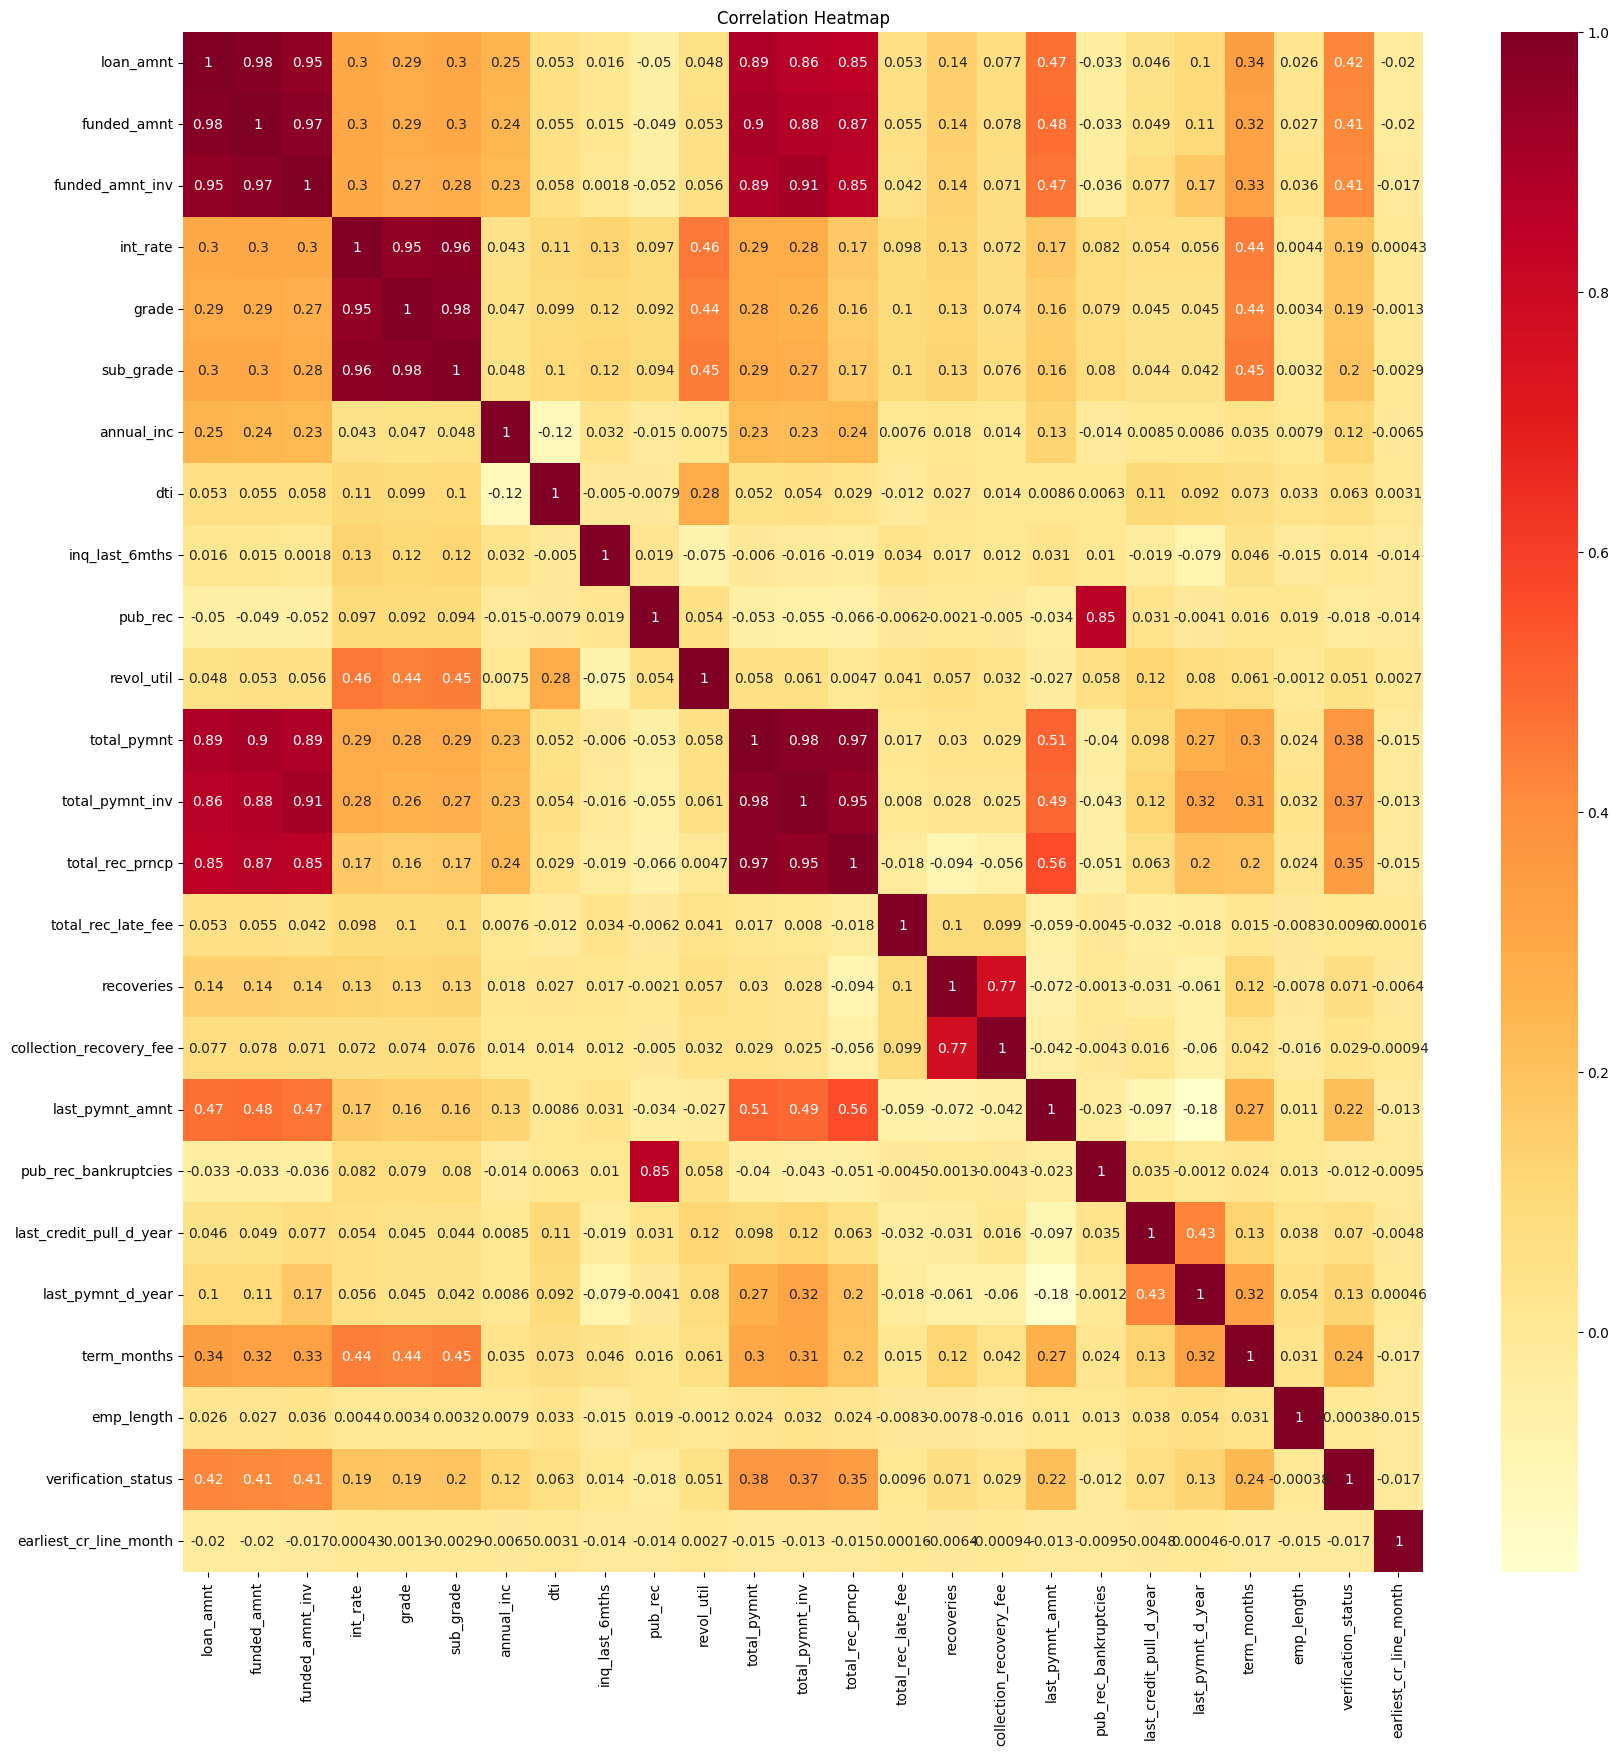

feature         VIF
11              total_pymnt  230.673557
12          total_pymnt_inv  181.186400
1               funded_amnt  158.207513
2           funded_amnt_inv  135.531322
13          total_rec_prncp   62.677585
5                 sub_grade   32.306377
0                 loan_amnt   30.327173
4                     grade   23.763792
3                  int_rate   14.527717
9                   pub_rec    3.882412
18     pub_rec_bankruptcies    3.829820
15               recoveries    3.591118
17          last_pymnt_amnt    2.752536
24   earliest_cr_line_month    2.673032
21              term_months    2.641907
16  collection_recovery_fee    2.600208
22               emp_length    2.559516
20        last_pymnt_d_year    2.319692
23      verification_status    2.314829
10               revol_util    1.486504
19  last_credit_pull_d_year    1.452359
7                       dti    1.131626
6                annual_inc    1.117592
14       total_rec_late_fee    1.074407
8            inq_last_6mths    1.069856

In [102]:
calculate_vif_and_correlation(X_train_final[selected_fscore_features])

In [ ]:
model2 = LogisticRegression()
model2.fit(X_train_sm2[selected_fscore_features], y_train_sm2)

LogisticRegression()

Accuracy: 99.7187%
Precision: 99.7044%
Recall: 99.9682%
F1-score: 99.8362%


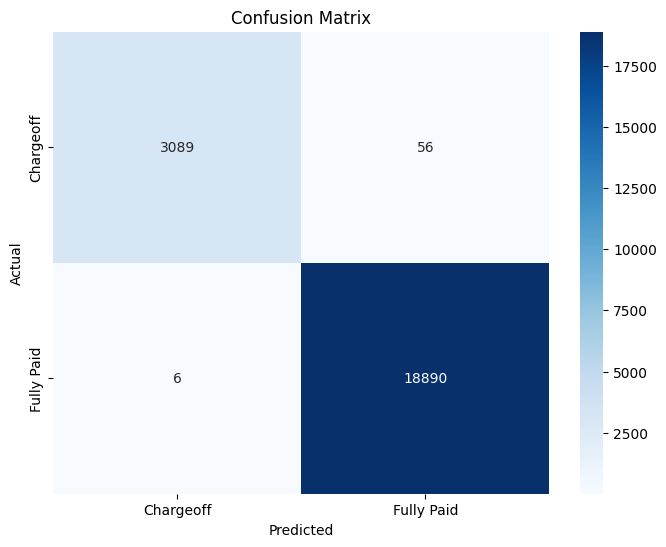


Classification Report for Training Data with 25 features which have best F-statistics:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3145
           1       1.00      1.00      1.00     18896

    accuracy                           1.00     22041
   macro avg       1.00      0.99      0.99     22041
weighted avg       1.00      1.00      1.00     22041



In [ ]:
y_pred_tr2 = model2.predict(X_train_final[selected_fscore_features])
accuracy_tr2 = accuracy_score(y_train, y_pred_tr2)
f1_score_tr2 = f1_score(y_train, y_pred_tr2)
recall_tr2 = recall_score(y_train, y_pred_tr2)
precision_tr2 = precision_score(y_train,y_pred_tr2)

print("Accuracy: {:.4f}%".format(accuracy_tr2 * 100))
print("Precision: {:.4f}%".format(precision_tr2 * 100))
print("Recall: {:.4f}%".format(recall_tr2 * 100))
print("F1-score: {:.4f}%".format(f1_score_tr2 * 100))


# evaluate the model
cm5 = confusion_matrix(y_train,y_pred_tr2)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Chargeoff', 'Fully Paid'],
            yticklabels = ['Chargeoff', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report for Training Data with 25 features which have best F-statistics:\n", classification_report(y_train, y_pred_tr2))

Accuracy: 99.6462%
Precision: 99.6220%
Recall: 99.9684%
F1-score: 99.7949%


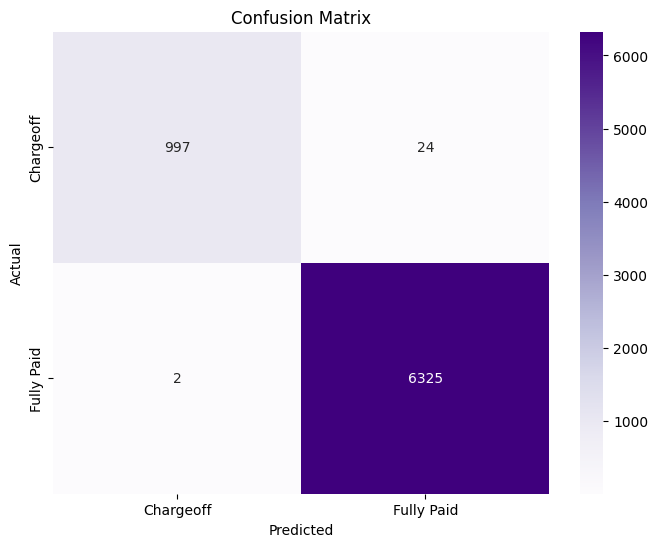


 Classification Report for Test Data with 25 features which have best F-statistics:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1021
           1       1.00      1.00      1.00      6327

    accuracy                           1.00      7348
   macro avg       1.00      0.99      0.99      7348
weighted avg       1.00      1.00      1.00      7348



In [ ]:
y_pred_test2 = model2.predict(X_test_final[selected_fscore_features])
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
f1_score_test2 = f1_score(y_test, y_pred_test2)
recall_test2 = recall_score(y_test, y_pred_test2)
precision_test2 = precision_score(y_test,y_pred_test2)

print("Accuracy: {:.4f}%".format(accuracy_test2* 100))
print("Precision: {:.4f}%".format(precision_test2 * 100))
print("Recall: {:.4f}%".format(recall_test2 * 100))
print("F1-score: {:.4f}%".format(f1_score_test2 * 100))



# evaluate the model
cm4 = confusion_matrix(y_test,y_pred_test2)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Chargeoff', 'Fully Paid'],
            yticklabels = ['Chargeoff', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\n Classification Report for Test Data with 25 features which have best F-statistics:\n", classification_report(y_test, y_pred_test2))

In [105]:
model2 = LogisticRegression()
model2.fit(X_train_sm2, y_train_sm2)

LogisticRegression()

Jarque-Bera test for normality of residuals: JB = 471138.0672, p-value = 0.0000


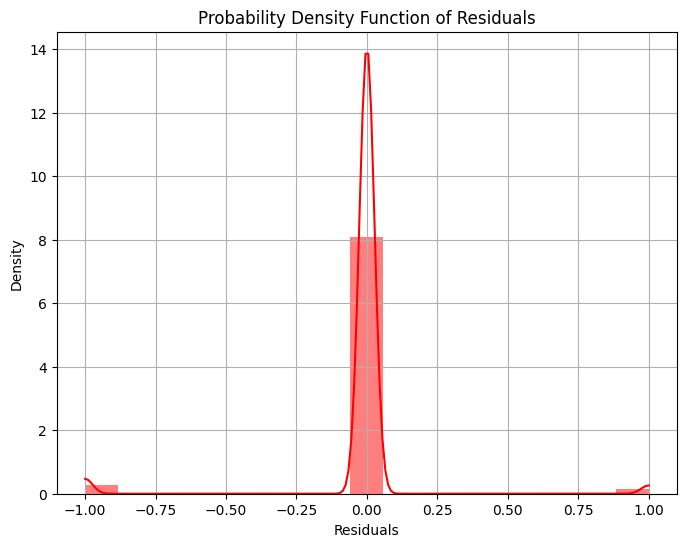

1

In [106]:
jb_test(y_train_sm2,model2.predict(X_train_sm2))

In [107]:
durbin_watson_test(y_train_sm2,model2.predict(X_train_sm2))

Durbin-Watson statistic: 1.9495


1.949516648764769

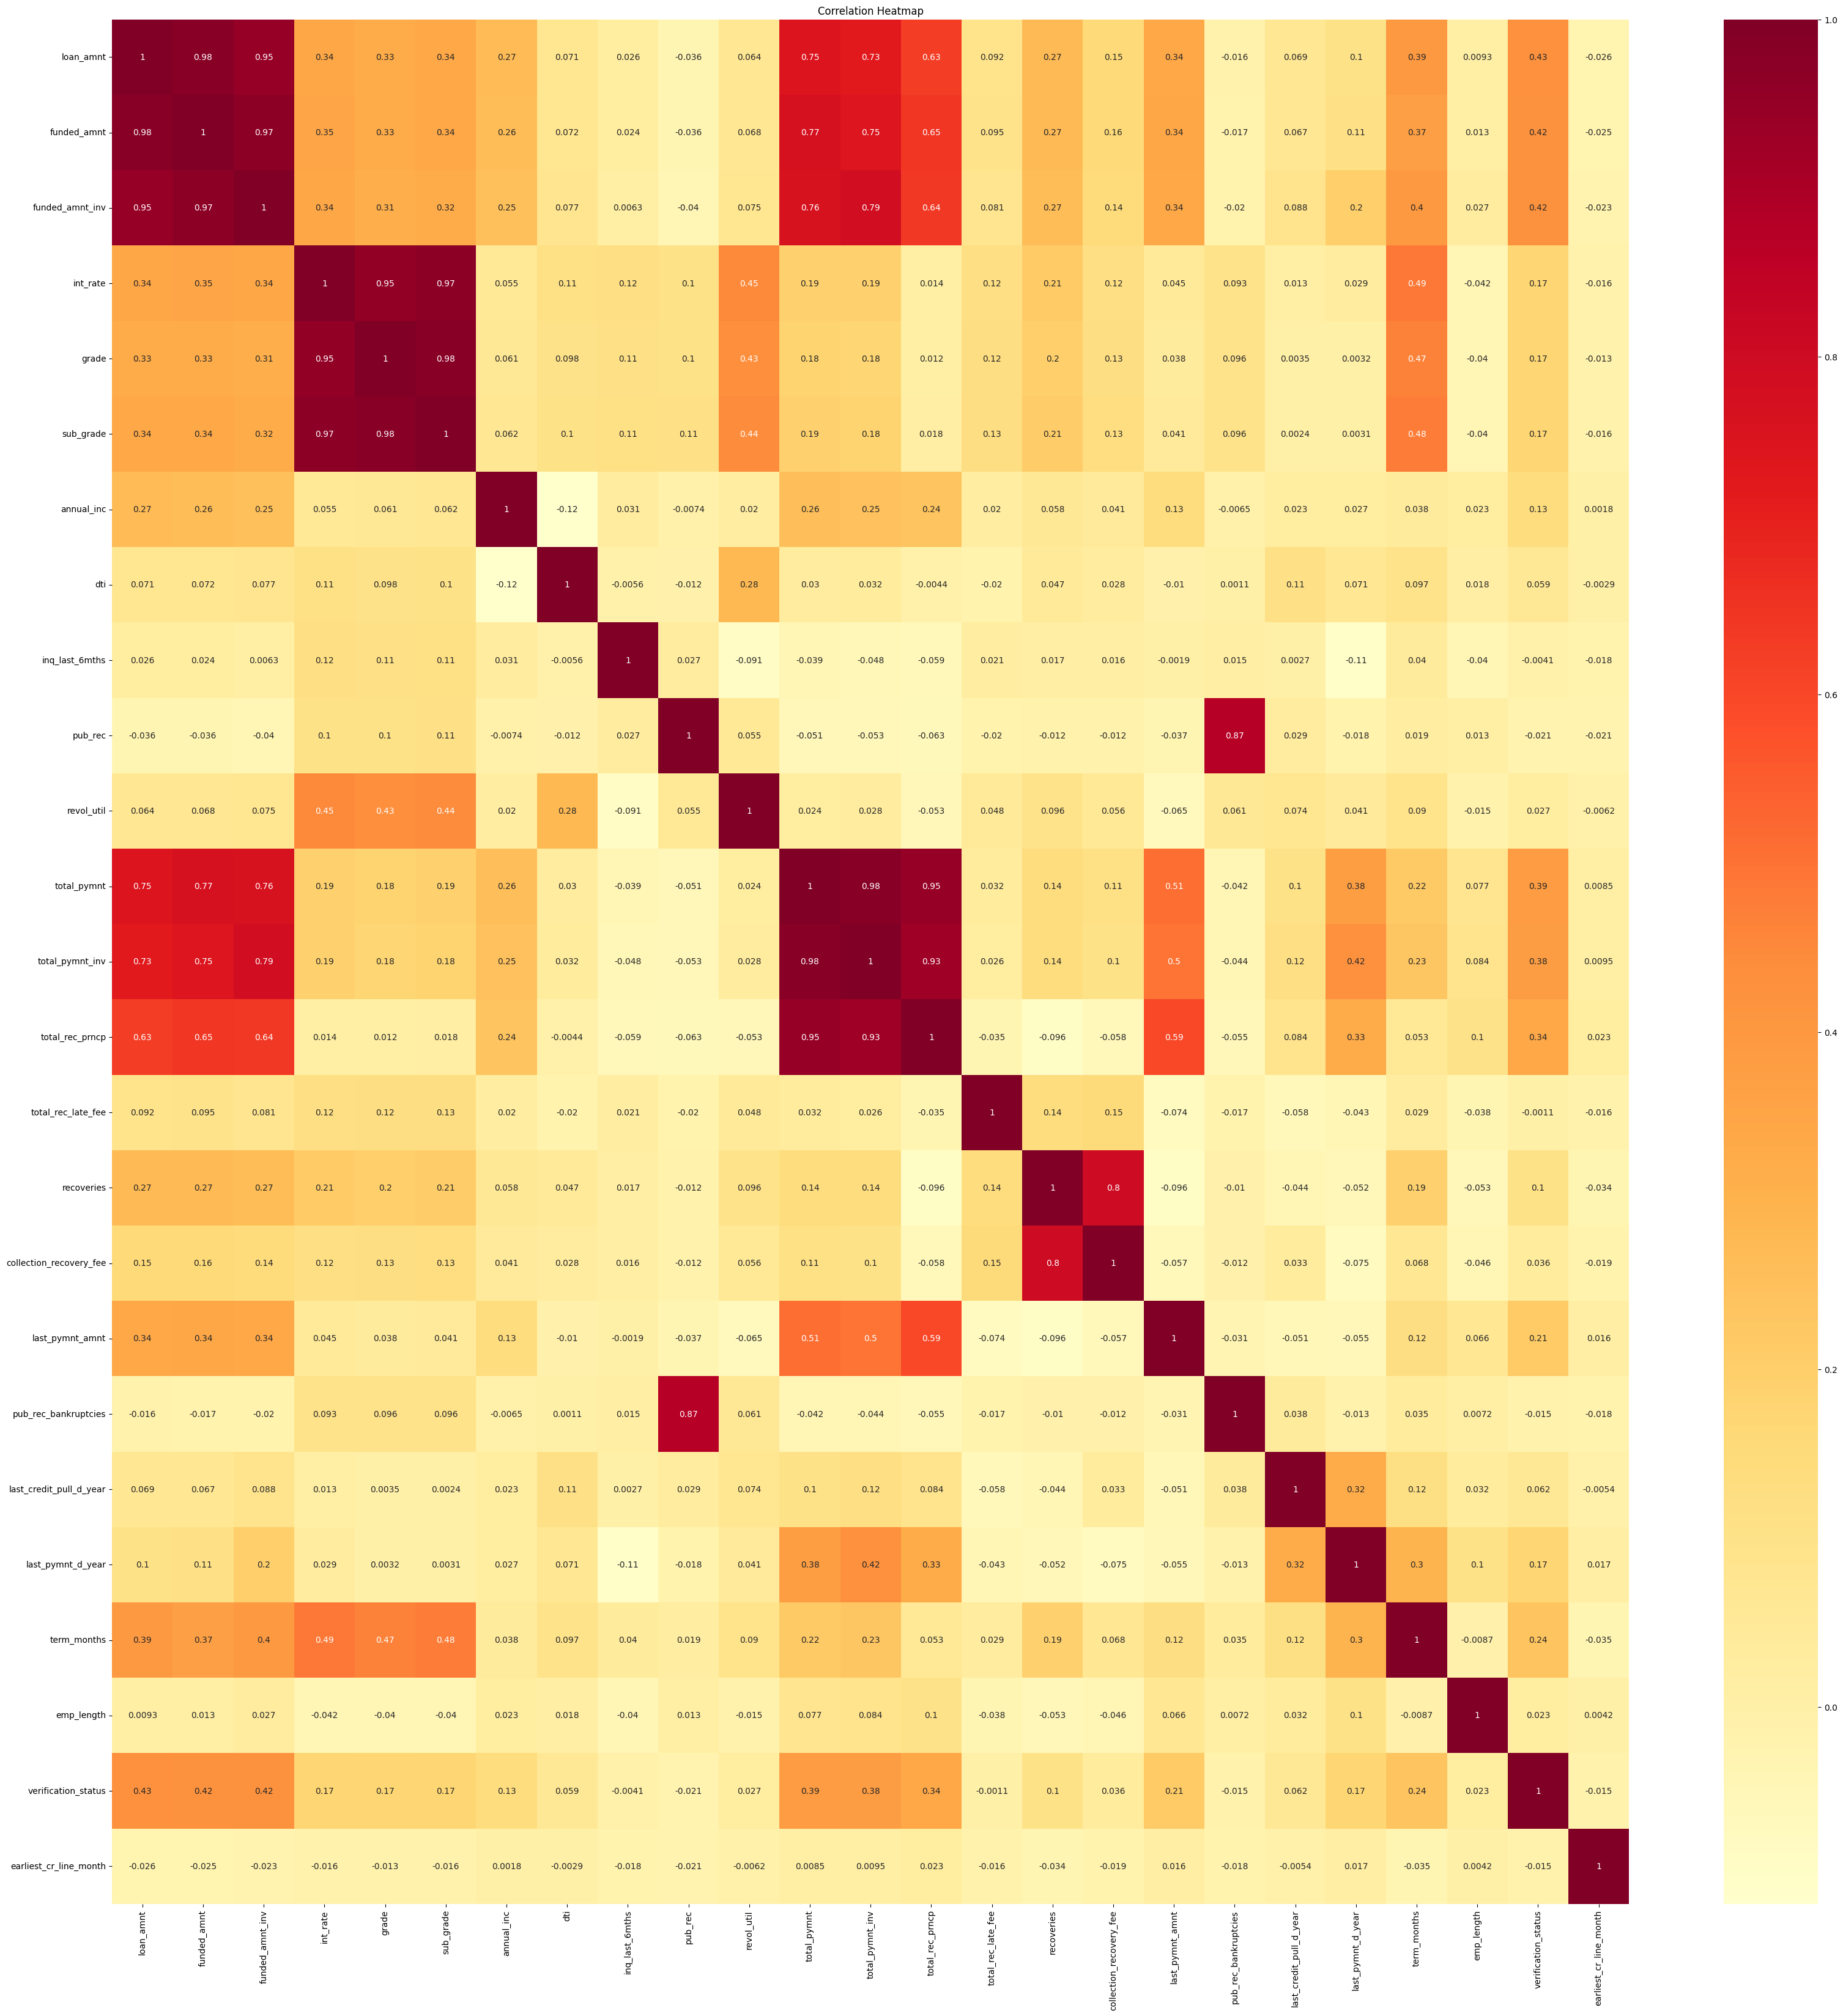

feature         VIF
11              total_pymnt  140.534041
12          total_pymnt_inv   92.992337
1               funded_amnt   84.754211
2           funded_amnt_inv   56.545825
13          total_rec_prncp   51.907916
5                 sub_grade   38.424151
4                     grade   31.123675
0                 loan_amnt   30.309837
3                  int_rate   17.023979
15               recoveries    5.744700
9                   pub_rec    4.439240
18     pub_rec_bankruptcies    4.379528
21              term_months    3.246439
16  collection_recovery_fee    3.149747
24   earliest_cr_line_month    2.805515
20        last_pymnt_d_year    2.637629
22               emp_length    2.522369
17          last_pymnt_amnt    2.456088
23      verification_status    2.320067
10               revol_util    1.478570
19  last_credit_pull_d_year    1.403093
14       total_rec_late_fee    1.147488
7                       dti    1.137085
6                annual_inc    1.135937
8            inq_last_6mths    1.070118

In [108]:
calculate_vif_and_correlation_dataframe(X_train_sm2[selected_fscore_features])

The model predictions are good but there is significant multicollinearity
in the dataset even after selecting 25 best features. The residuals are again highly centred about 0 and have an equal spread although we have strong evidence to conclude that the distribution is not Gaussian distributed.
The Durbin Watson statistic is close to 2 indicating very low auto-correlation

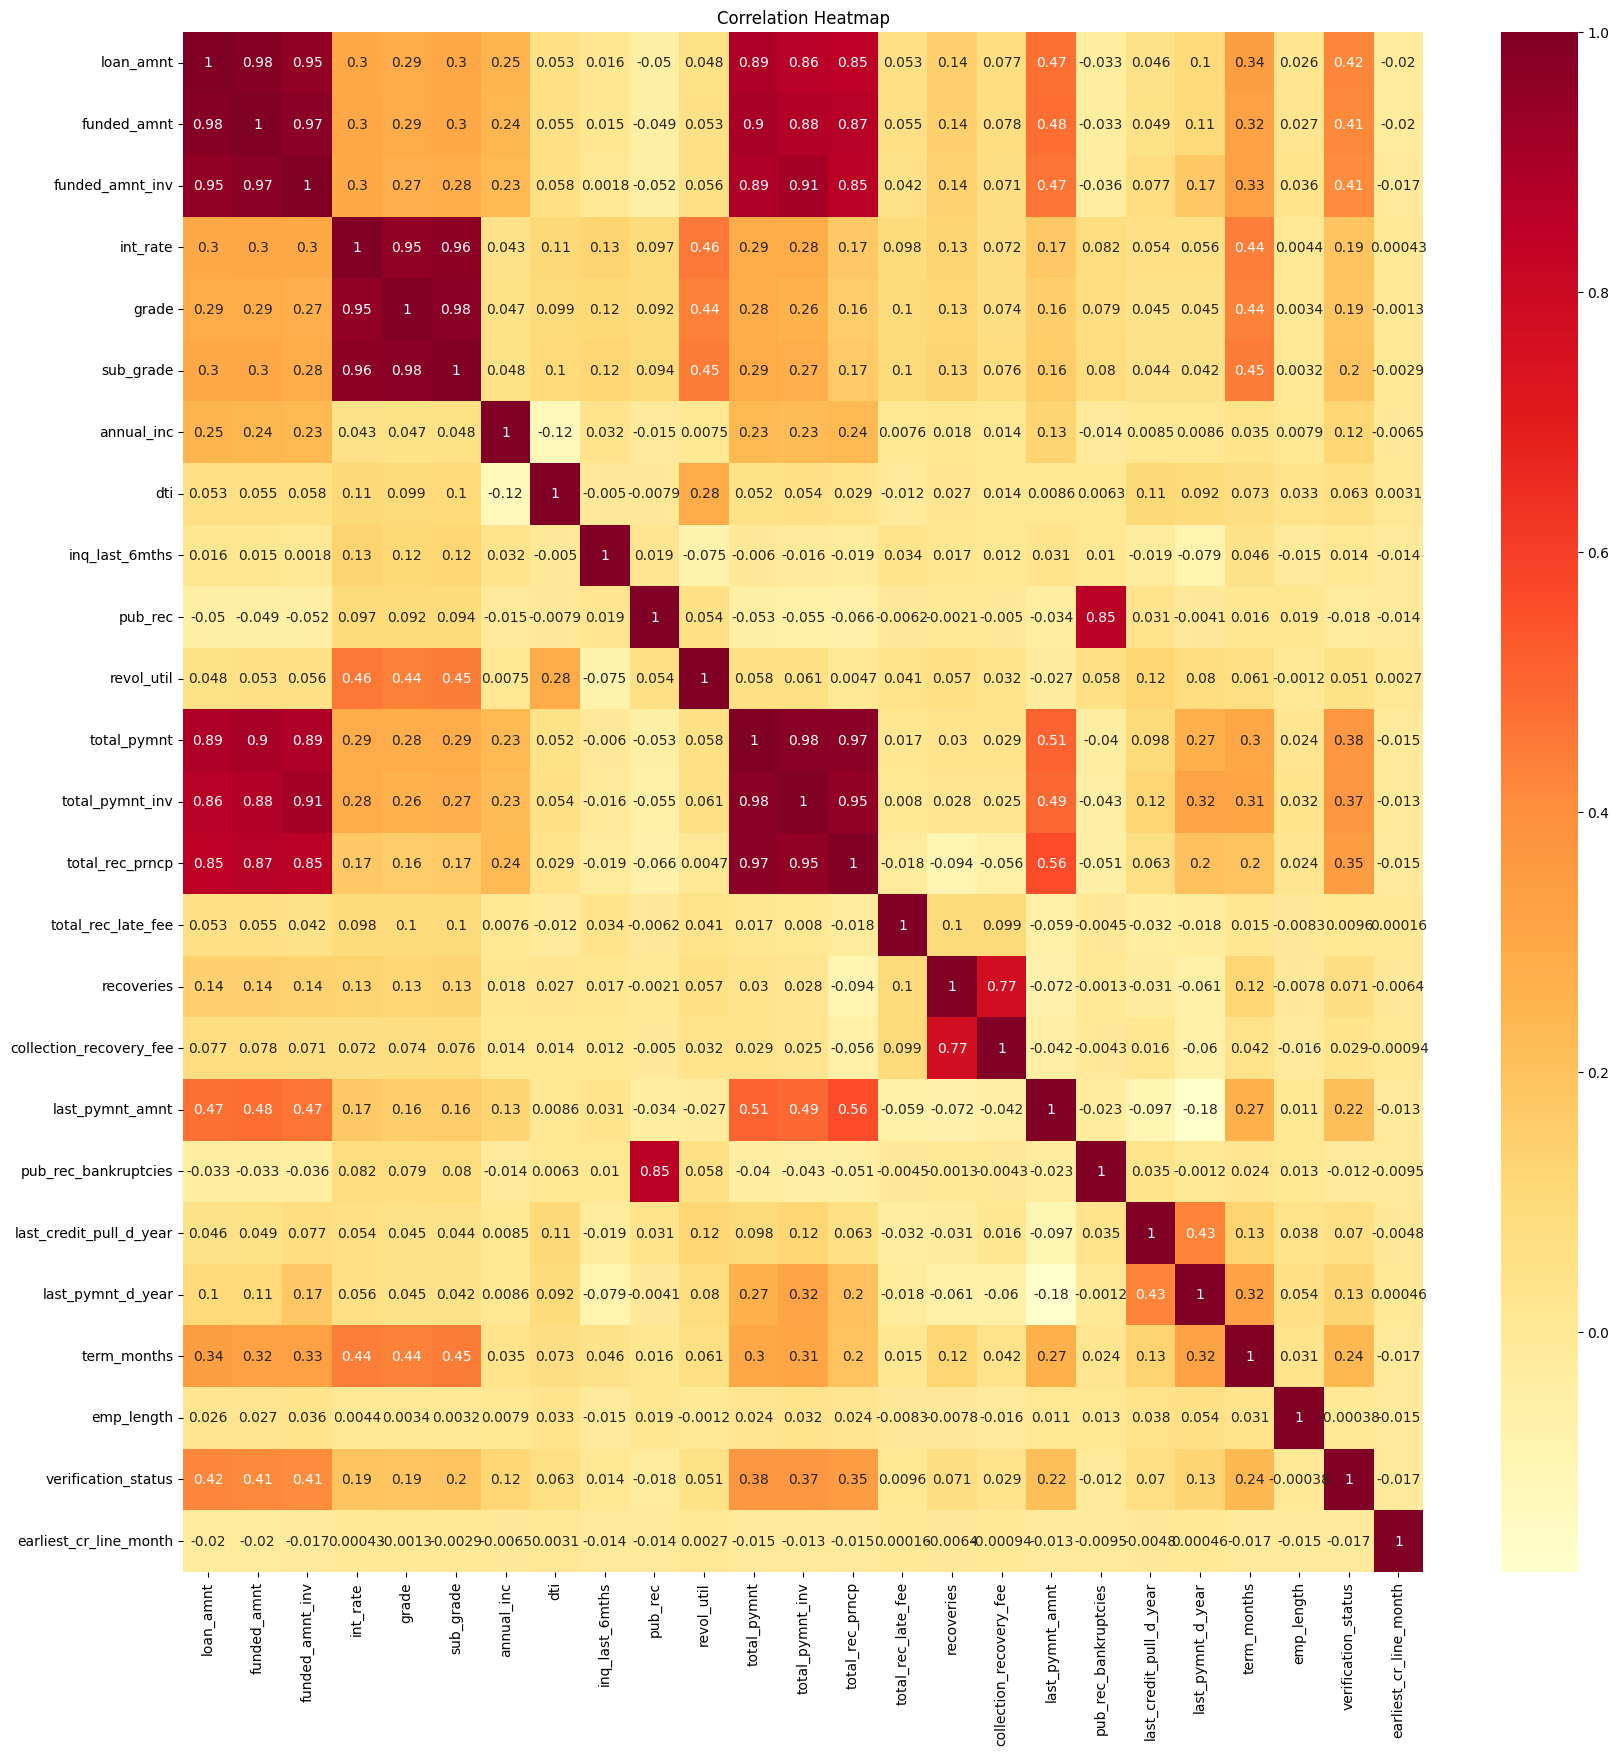

In [109]:
vif_table = calculate_vif_and_correlation(X_train_final[selected_fscore_features])

In [110]:
vif_table

feature         VIF
11              total_pymnt  230.673557
12          total_pymnt_inv  181.186400
1               funded_amnt  158.207513
2           funded_amnt_inv  135.531322
13          total_rec_prncp   62.677585
5                 sub_grade   32.306377
0                 loan_amnt   30.327173
4                     grade   23.763792
3                  int_rate   14.527717
9                   pub_rec    3.882412
18     pub_rec_bankruptcies    3.829820
15               recoveries    3.591118
17          last_pymnt_amnt    2.752536
24   earliest_cr_line_month    2.673032
21              term_months    2.641907
16  collection_recovery_fee    2.600208
22               emp_length    2.559516
20        last_pymnt_d_year    2.319692
23      verification_status    2.314829
10               revol_util    1.486504
19  last_credit_pull_d_year    1.452359
7                       dti    1.131626
6                annual_inc    1.117592
14       total_rec_late_fee    1.074407
8            inq_last_6mths    1.069856

In [111]:
vif_table.sort_values(by ='VIF', ascending = True)

feature         VIF
8            inq_last_6mths    1.069856
14       total_rec_late_fee    1.074407
6                annual_inc    1.117592
7                       dti    1.131626
19  last_credit_pull_d_year    1.452359
10               revol_util    1.486504
23      verification_status    2.314829
20        last_pymnt_d_year    2.319692
22               emp_length    2.559516
16  collection_recovery_fee    2.600208
21              term_months    2.641907
24   earliest_cr_line_month    2.673032
17          last_pymnt_amnt    2.752536
15               recoveries    3.591118
18     pub_rec_bankruptcies    3.829820
9                   pub_rec    3.882412
3                  int_rate   14.527717
4                     grade   23.763792
0                 loan_amnt   30.327173
5                 sub_grade   32.306377
13          total_rec_prncp   62.677585
2           funded_amnt_inv  135.531322
1               funded_amnt  158.207513
12          total_pymnt_inv  181.186400
11              total_pymnt  230.673557

Removed the features with VIF score greater than 5. This was done to remove problematic multi-collinearity from the data.

In [114]:
vif_table[vif_table.VIF <=5].feature

9                     pub_rec
18       pub_rec_bankruptcies
15                 recoveries
17            last_pymnt_amnt
24     earliest_cr_line_month
21                term_months
16    collection_recovery_fee
22                 emp_length
20          last_pymnt_d_year
23        verification_status
10                 revol_util
19    last_credit_pull_d_year
7                         dti
6                  annual_inc
14         total_rec_late_fee
8              inq_last_6mths
Name: feature, dtype: object

## 16 features out of the top 25 features in terms of F-score(F statistic) are selected which have VIF lesser than 5

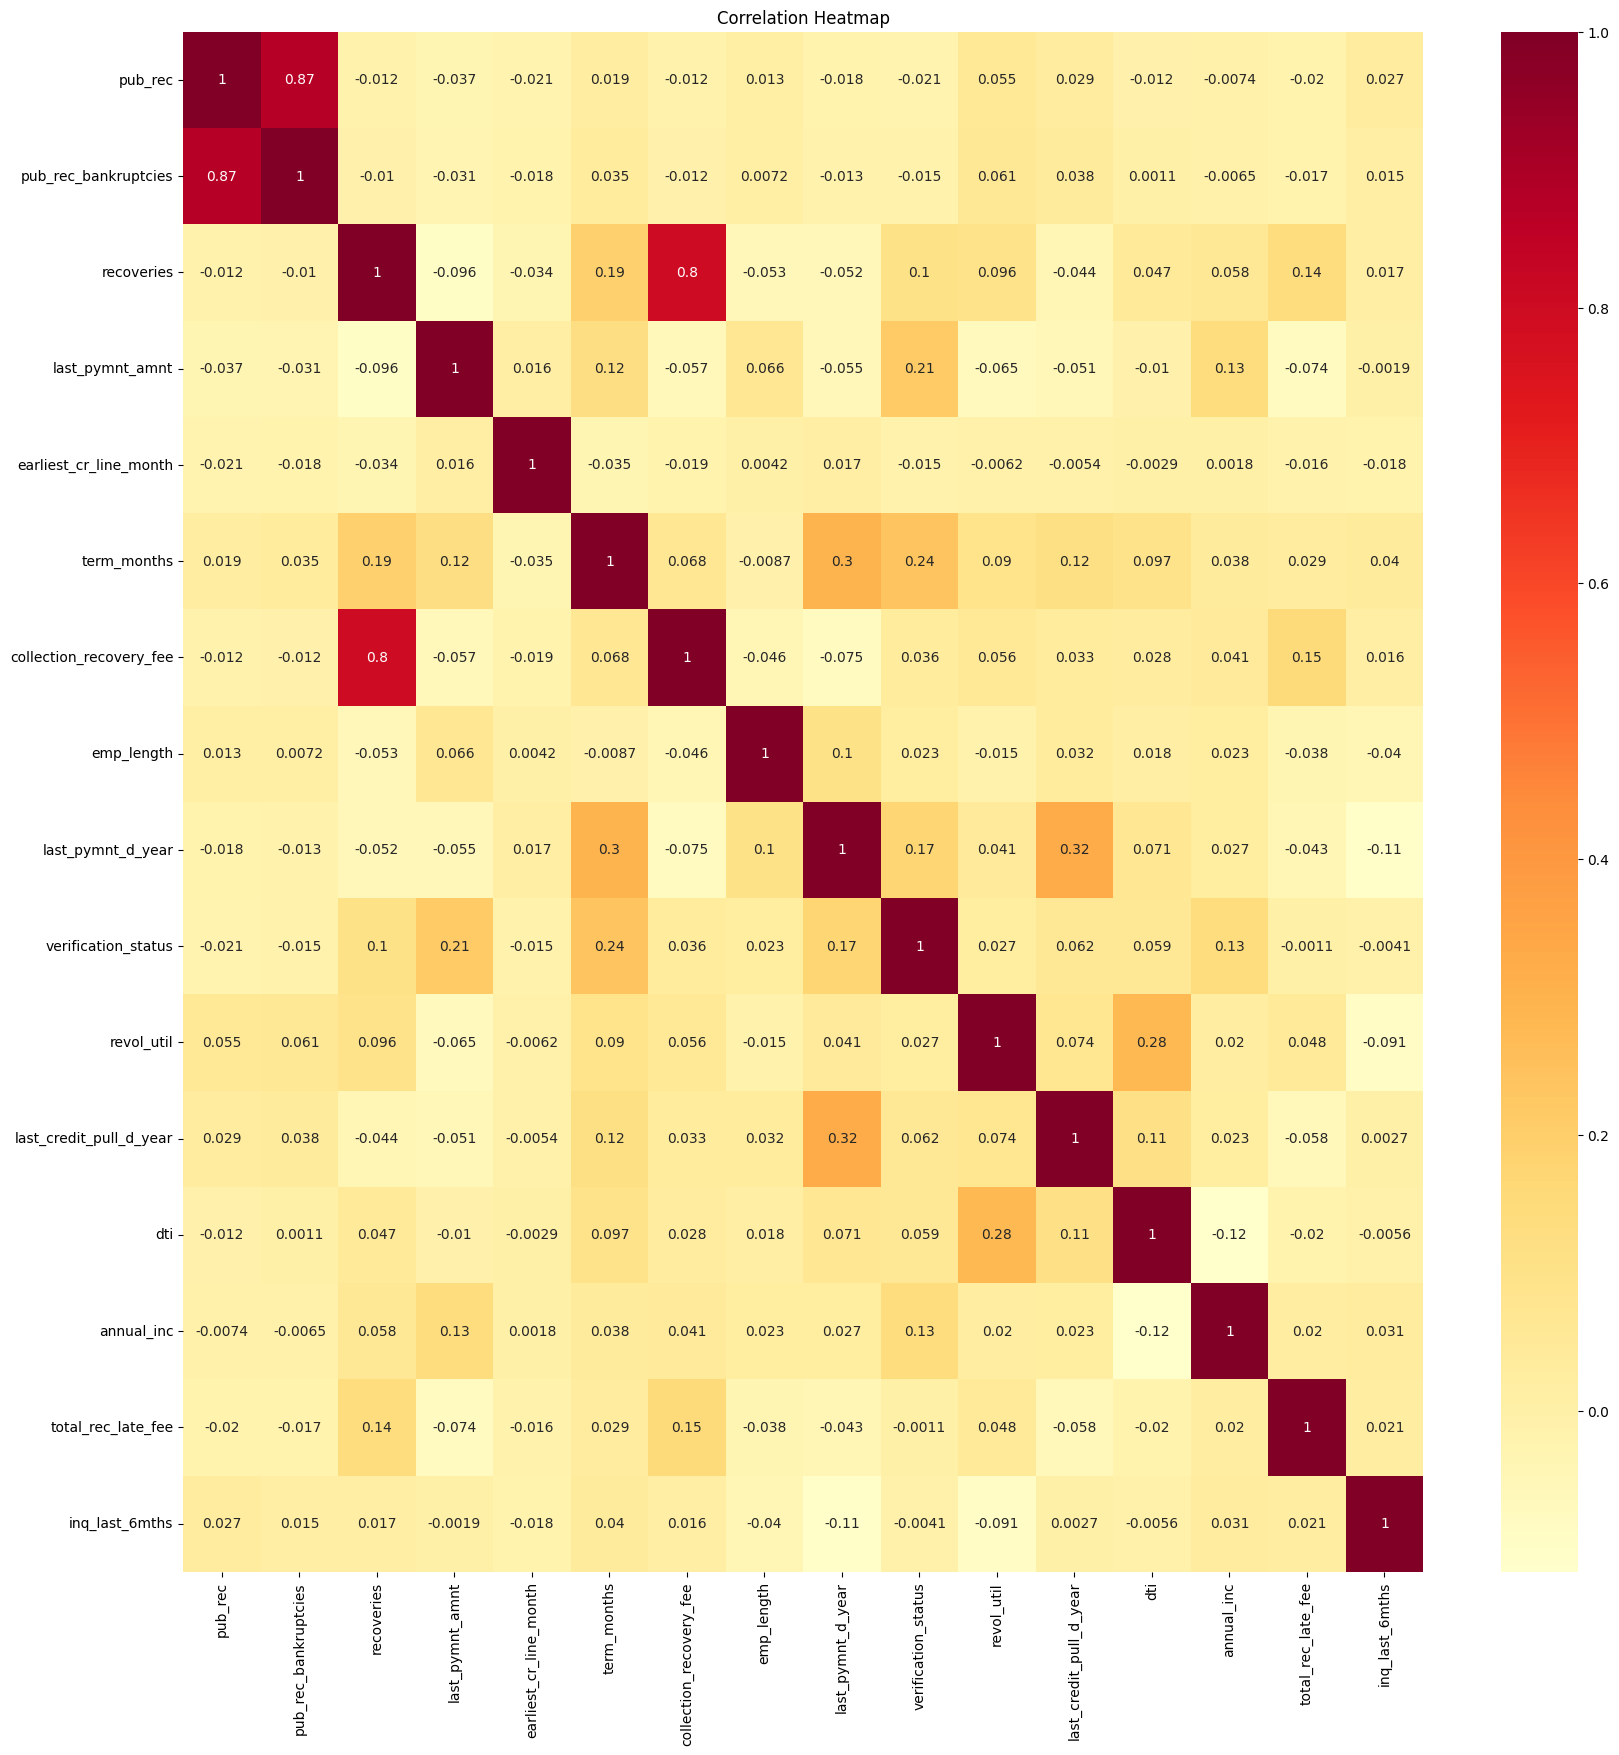

feature       VIF
0                   pub_rec  4.408339
1      pub_rec_bankruptcies  4.370621
2                recoveries  3.368510
6   collection_recovery_fee  3.044474
4    earliest_cr_line_month  2.437018
7                emp_length  2.283451
9       verification_status  2.073183
5               term_months  1.821453
11  last_credit_pull_d_year  1.375199
8         last_pymnt_d_year  1.364128
3           last_pymnt_amnt  1.252124
10               revol_util  1.134581
12                      dti  1.126552
14       total_rec_late_fee  1.105687
13               annual_inc  1.073722
15           inq_last_6mths  1.034336

In [115]:
calculate_vif_and_correlation(X_train_sm2[vif_table[vif_table.VIF <=5].feature])

Since the pub_rec_bankruptcies is highly correlated with pub_rec and has a lower feature importance as per the F-statistic. Hence we will drop this column to remove the multi-collinearity cause by it.

In [116]:
features = list(vif_table[vif_table.VIF <=5]['feature'])

In [117]:
features.remove('pub_rec_bankruptcies')

In [118]:
features

['pub_rec',
 'recoveries',
 'last_pymnt_amnt',
 'earliest_cr_line_month',
 'term_months',
 'collection_recovery_fee',
 'emp_length',
 'last_pymnt_d_year',
 'verification_status',
 'revol_util',
 'last_credit_pull_d_year',
 'dti',
 'annual_inc',
 'total_rec_late_fee',
 'inq_last_6mths']

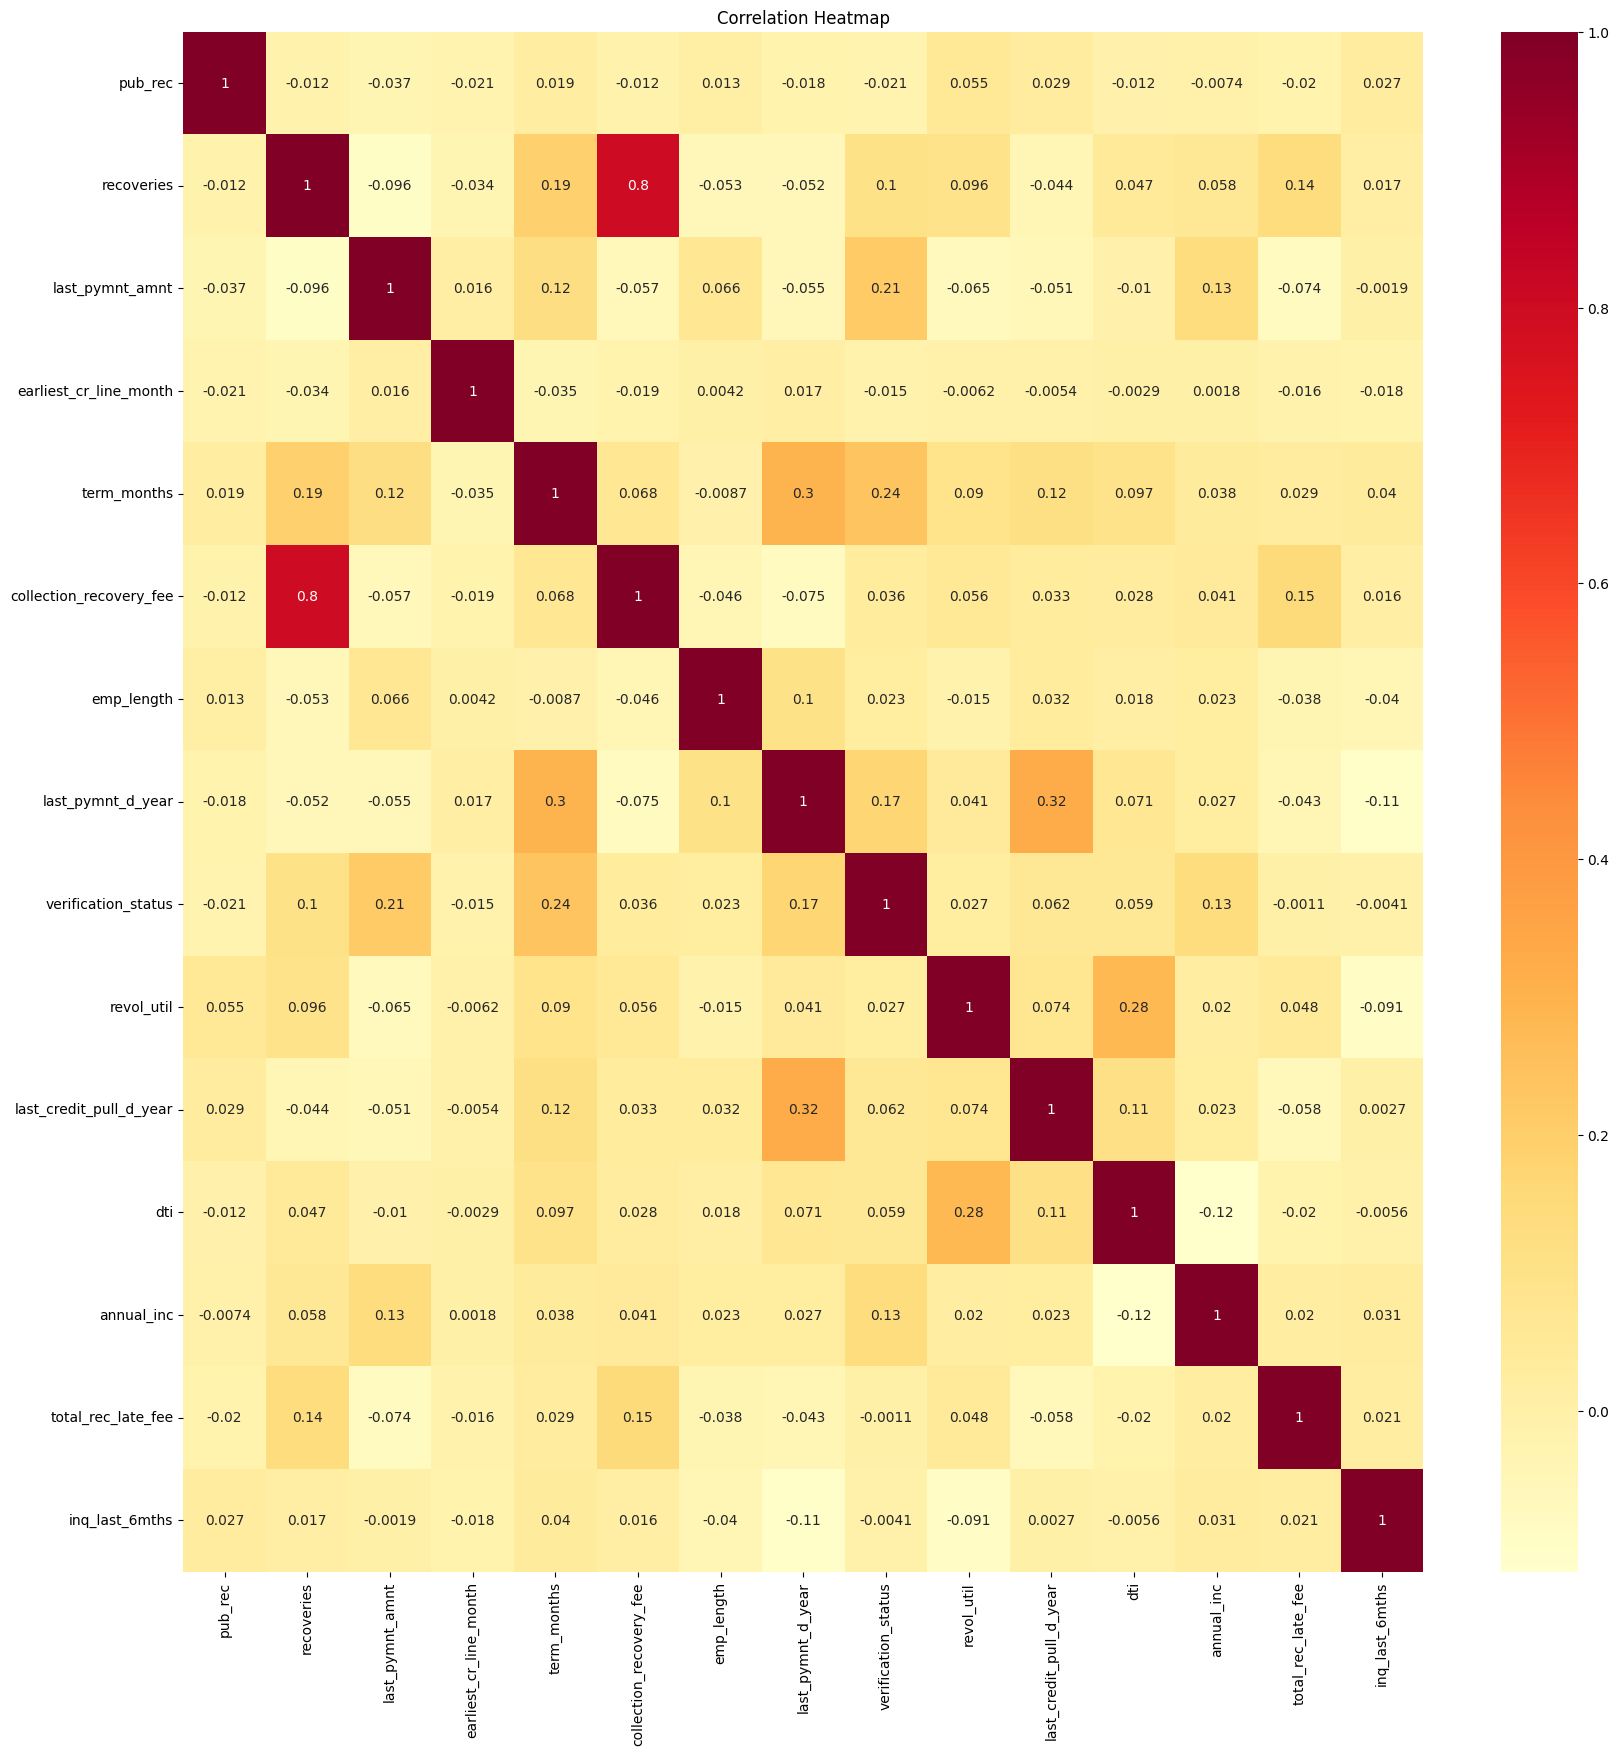

feature       VIF
1                recoveries  3.368470
5   collection_recovery_fee  3.044460
3    earliest_cr_line_month  2.436966
6                emp_length  2.283274
8       verification_status  2.073183
4               term_months  1.818880
10  last_credit_pull_d_year  1.374525
7         last_pymnt_d_year  1.363694
2           last_pymnt_amnt  1.252124
9                revol_util  1.134298
11                      dti  1.126354
13       total_rec_late_fee  1.105685
12               annual_inc  1.073720
0                   pub_rec  1.070108
14           inq_last_6mths  1.033887

In [119]:
calculate_vif_and_correlation(X_train_sm2[features])

Again since there high correlation between recoveries and collection_recovery_fee and the latter is lower in F Statistic score. We drop the latter i.e. collection_recovery_fee

In [120]:
features.remove('collection_recovery_fee')

In [122]:
model2 = LogisticRegression()
model2.fit(X_train_sm2[features], y_train_sm2)

LogisticRegression()

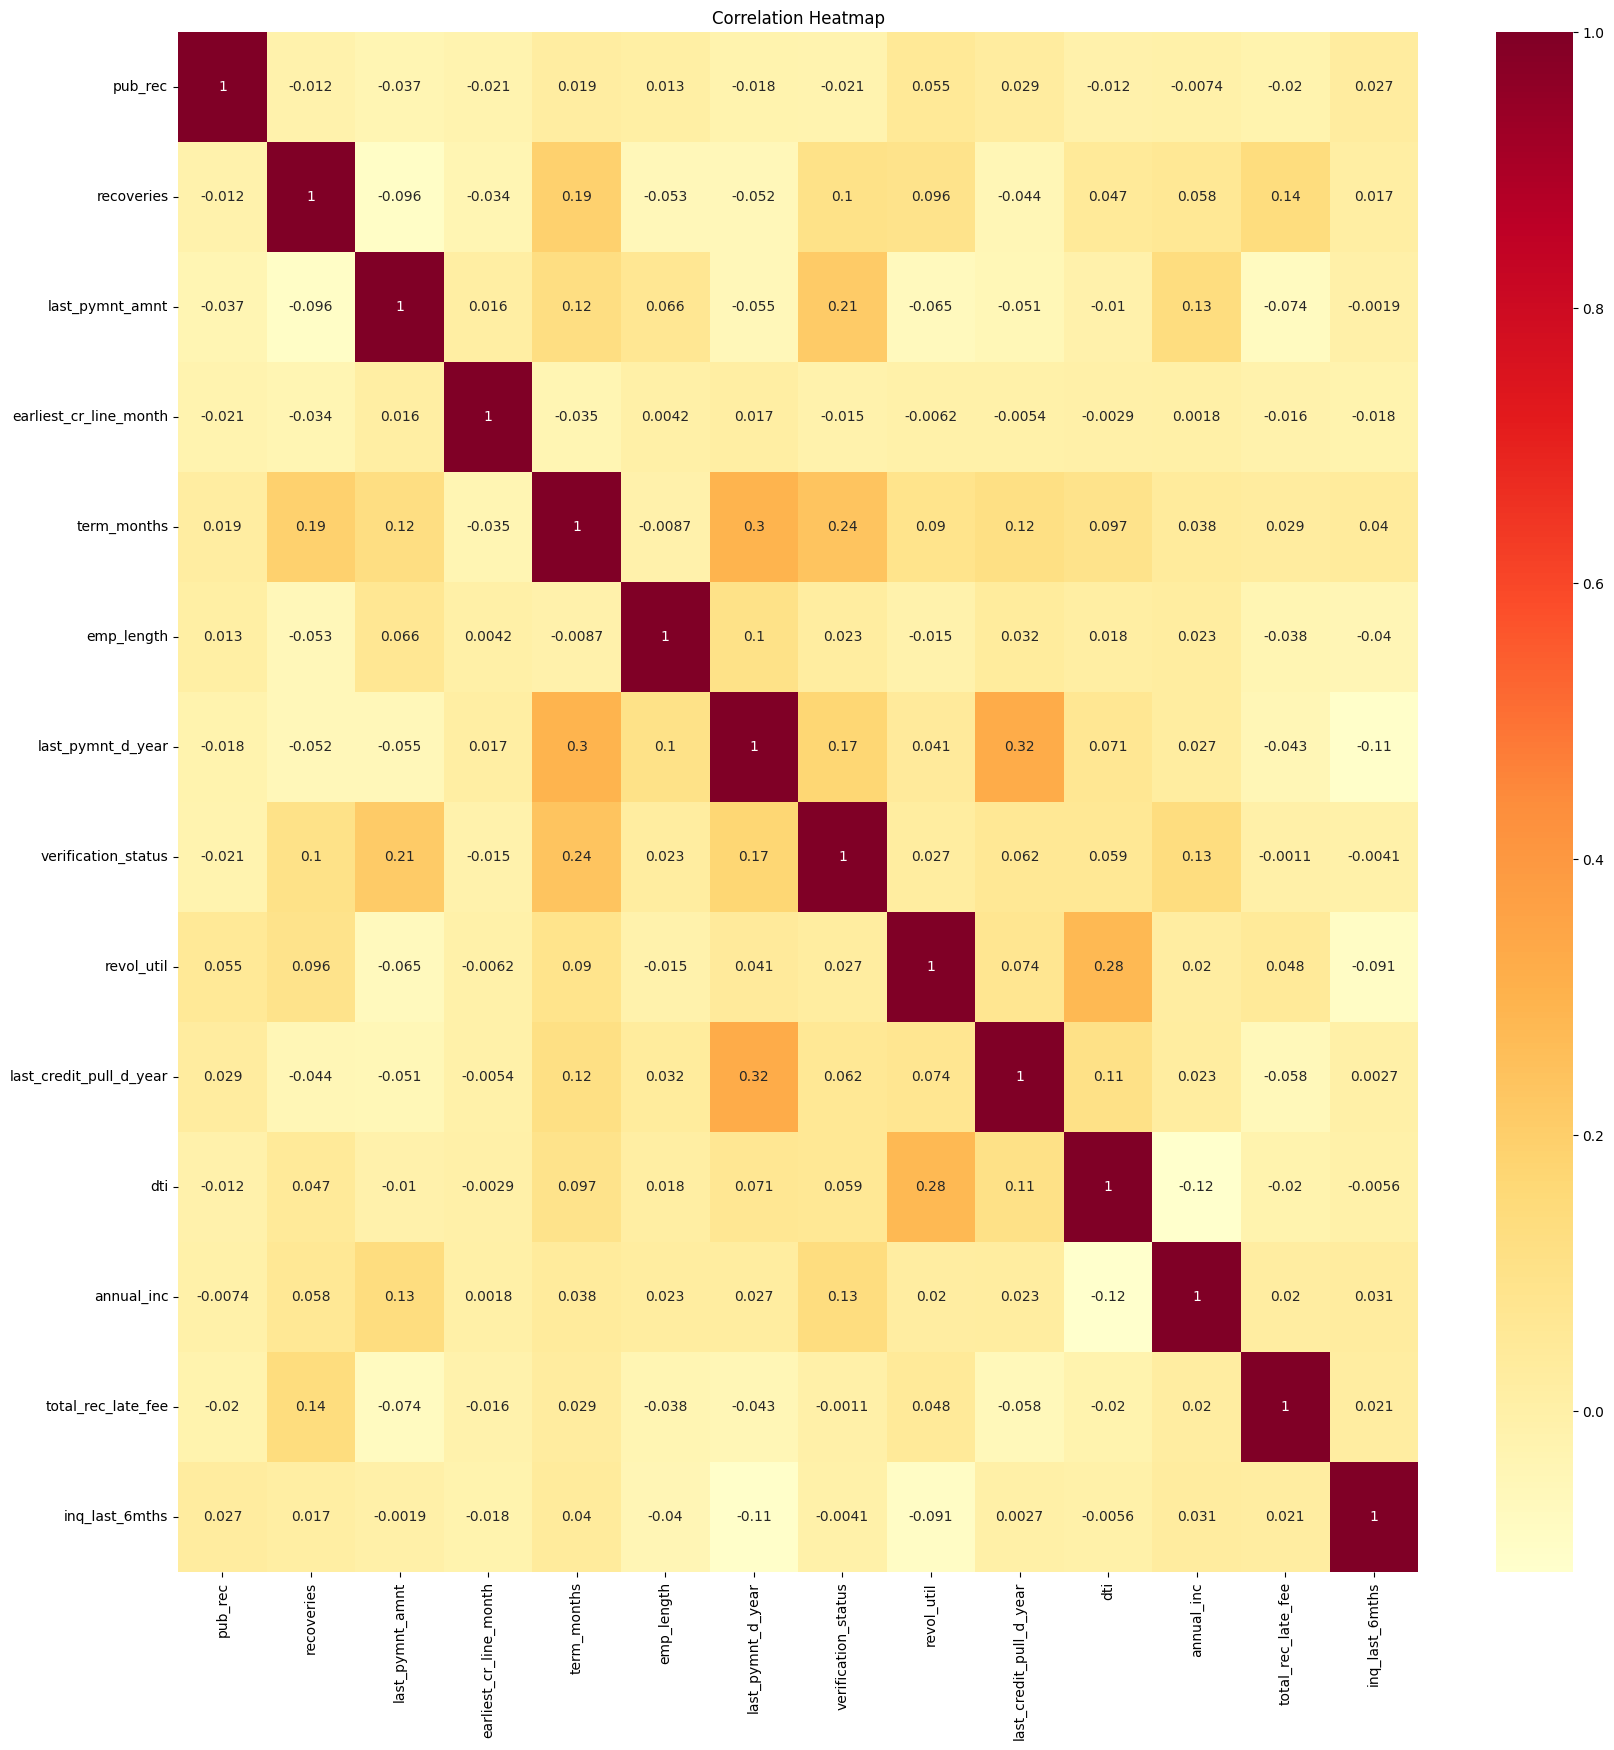

feature       VIF
3    earliest_cr_line_month  2.434113
5                emp_length  2.283079
7       verification_status  2.066912
4               term_months  1.786186
6         last_pymnt_d_year  1.360738
9   last_credit_pull_d_year  1.342410
2           last_pymnt_amnt  1.244565
1                recoveries  1.192696
8                revol_util  1.133274
10                      dti  1.126330
12       total_rec_late_fee  1.098517
11               annual_inc  1.073544
0                   pub_rec  1.070105
13           inq_last_6mths  1.033885

In [ ]:
calculate_vif_and_correlation(X_train_sm2[features])

Jarque-Bera test for normality of residuals: JB = 857535.8584, p-value = 0.0000


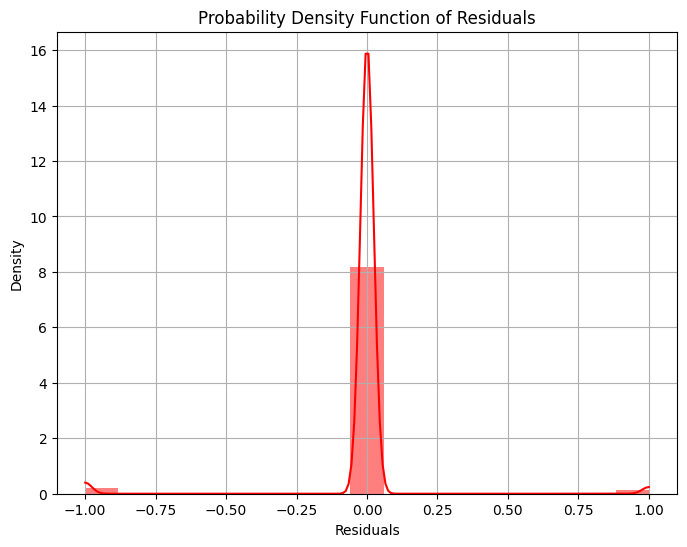

1

In [127]:
jb_test(y_train_sm2,model2.predict(X_train_sm2[features]))

In [128]:
durbin_watson_test(y_train_sm2,model2.predict(X_train_sm2[features]))

Durbin-Watson statistic: 1.9429


1.9428571428571428

The Durbin Watson statistic and the residuals are mostly the same but the multi-collinearity has been reduced significantly. Now inspecting the model metrics. model2 is the model which is the best

Accuracy: 96.6835%
Precision: 98.9649%
Recall: 97.1475%
F1-score: 98.0478%


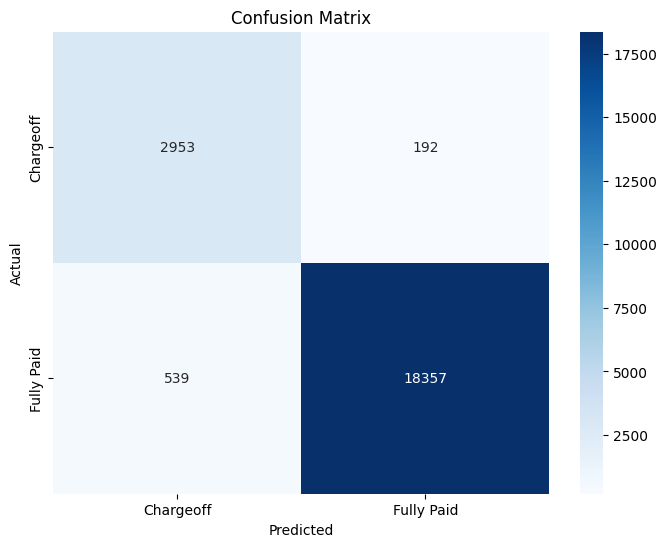


Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      3145
           1       0.99      0.97      0.98     18896

    accuracy                           0.97     22041
   macro avg       0.92      0.96      0.94     22041
weighted avg       0.97      0.97      0.97     22041



In [129]:
y_pred_tr2 = model2.predict(X_train_final[features])
accuracy_tr2 = accuracy_score(y_train, y_pred_tr2)
f1_score_tr2 = f1_score(y_train, y_pred_tr2)
recall_tr2 = recall_score(y_train, y_pred_tr2)
precision_tr2 = precision_score(y_train,y_pred_tr2)

print("Accuracy: {:.4f}%".format(accuracy_tr2 * 100))
print("Precision: {:.4f}%".format(precision_tr2 * 100))
print("Recall: {:.4f}%".format(recall_tr2 * 100))
print("F1-score: {:.4f}%".format(f1_score_tr2 * 100))


# evaluate the model
cm5 = confusion_matrix(y_train,y_pred_tr2)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Chargeoff', 'Fully Paid'],
            yticklabels = ['Chargeoff', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report for Training Data:\n", classification_report(y_train, y_pred_tr2))

Accuracy: 96.6249%
Precision: 98.8901%
Recall: 97.1709%
F1-score: 98.0230%


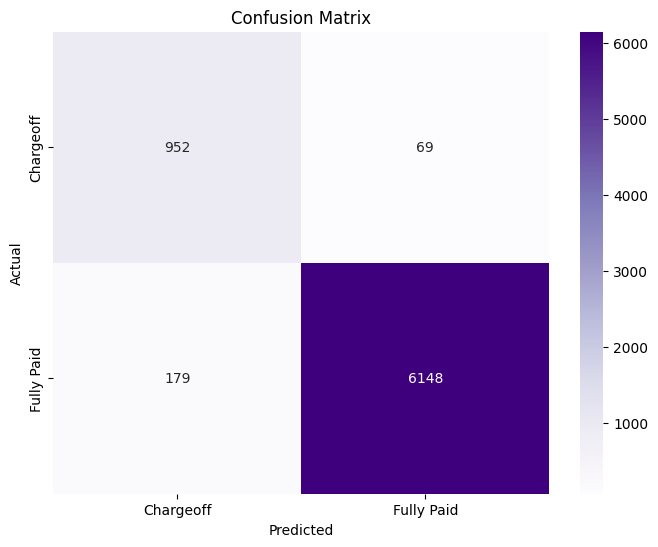


Classification Report (20best features using Fischer Scores):
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1021
           1       0.99      0.97      0.98      6327

    accuracy                           0.97      7348
   macro avg       0.92      0.95      0.93      7348
weighted avg       0.97      0.97      0.97      7348



In [130]:
y_pred_test2 = model2.predict(X_test_final[features])
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
f1_score_test2 = f1_score(y_test, y_pred_test2)
recall_test2 = recall_score(y_test, y_pred_test2)
precision_test2 = precision_score(y_test,y_pred_test2)

print("Accuracy: {:.4f}%".format(accuracy_test2* 100))
print("Precision: {:.4f}%".format(precision_test2 * 100))
print("Recall: {:.4f}%".format(recall_test2 * 100))
print("F1-score: {:.4f}%".format(f1_score_test2 * 100))



# evaluate the model
cm4 = confusion_matrix(y_test,y_pred_test2)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Chargeoff', 'Fully Paid'],
            yticklabels = ['Chargeoff', 'Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report (20best features using Fischer Scores):\n", classification_report(y_test, y_pred_test2))

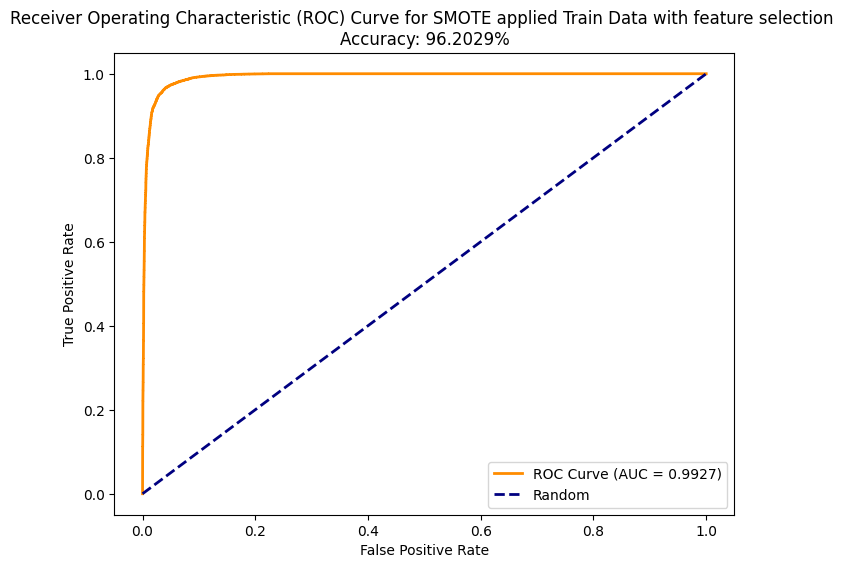

In [135]:
accuracy_tr2_sm = accuracy_score(y_train_sm2,model2.predict(X_train_sm2[features]))
# Plot ROC Curve
y_prob_tr_fs_sm = model2.predict_proba(X_train_sm2[features])[:, 1]
fpr, tpr, thresholds = roc_curve(y_train_sm2, y_prob_tr_fs_sm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SMOTE applied Train Data with feature selection \nAccuracy: {:.4f}%'.format(
	accuracy_tr2_sm * 100))
plt.legend(loc="lower right")
plt.show()

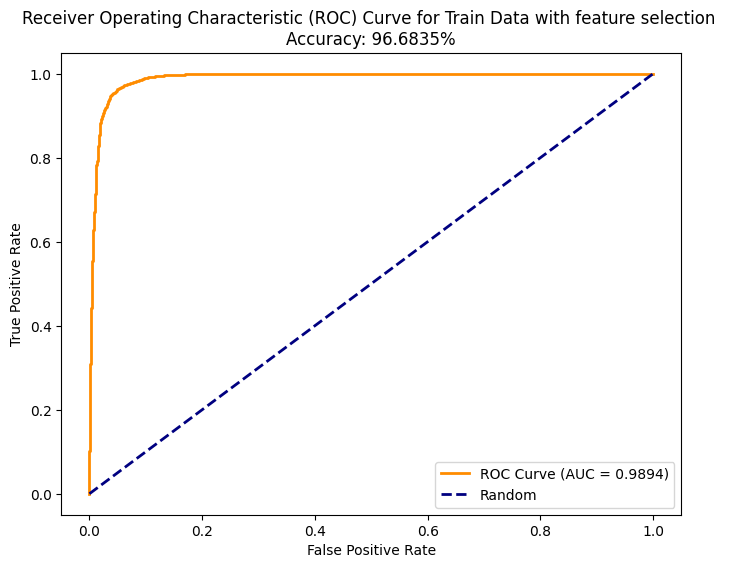

In [136]:
# Plot ROC Curve
y_prob_tr_fs = model2.predict_proba(X_train_final[features])[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_prob_tr_fs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Train Data with feature selection \nAccuracy: {:.4f}%'.format(
	accuracy_tr2 * 100))
plt.legend(loc="lower right")
plt.show()

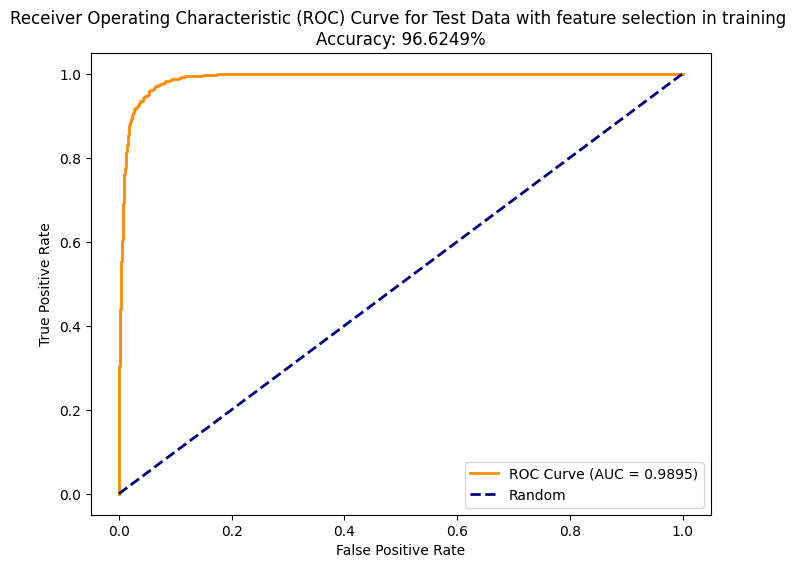

In [144]:
# Plot ROC Curve
y_prob_test_fs = model2.predict_proba(X_test_final[features])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test_fs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Data with feature selection in training \nAccuracy: {:.4f}%'.format(
	accuracy_test2 * 100))
plt.legend(loc="lower right")
plt.show()

In [138]:
feature_slopes = model2.coef_[0]  # For binary or multiclass classification
feature_slopes

array([-0.36596644, -5.0888045 ,  3.92889392,  0.03968201, -3.42715556,
        0.21100978,  2.80511049,  0.10672465, -0.29151182, -3.11021252,
       -0.22570289,  0.14511839, -0.01846104, -0.1938093 ])

In [139]:
Log_reg_weights = pd.DataFrame({'Feature':features, 'Logistic_regression_feature_weights':feature_slopes})
Log_reg_weights = Log_reg_weights.sort_values(by = 'Logistic_regression_feature_weights', ascending = False)
Log_reg_weights

Feature  Logistic_regression_feature_weights
2           last_pymnt_amnt                             3.928894
6         last_pymnt_d_year                             2.805110
5                emp_length                             0.211010
11               annual_inc                             0.145118
7       verification_status                             0.106725
3    earliest_cr_line_month                             0.039682
12       total_rec_late_fee                            -0.018461
13           inq_last_6mths                            -0.193809
10                      dti                            -0.225703
8                revol_util                            -0.291512
0                   pub_rec                            -0.365966
9   last_credit_pull_d_year                            -3.110213
4               term_months                            -3.427156
1                recoveries                            -5.088804

In [140]:
FI_df.sort_values(by = 'F-score', ascending = False).to_csv('Feature_importancesTop25.csv')
files.download('Feature_importancesTop25.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [141]:
final_features  = set(FI_df.iloc[:,0]).intersection(set(Log_reg_weights.iloc[:,0]))
final_features

{'annual_inc',
 'dti',
 'earliest_cr_line_month',
 'emp_length',
 'inq_last_6mths',
 'last_credit_pull_d_year',
 'last_pymnt_amnt',
 'last_pymnt_d_year',
 'pub_rec',
 'recoveries',
 'revol_util',
 'term_months',
 'total_rec_late_fee',
 'verification_status'}

In [142]:
FI_df_last = FI_df[FI_df['Feature'].isin(final_features)].sort_values(by = 'F-score', ascending = False)
FI_df_last.to_csv('FeatureImportancesFinal.csv')
files.download('FeatureImportancesFinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
Log_reg_weights
Log_reg_weights.to_csv('Feature_weights.csv')
files.download('Feature_weights.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### All the csv files after each stage of the project have been downloaded and uploaded to the github repository along with the feature importances and the feature weights of the logistic regression models trained in the project.
### The final model considered is the Model named - model2. We have retained 14 best features for our logistic regression model used for the dataframe where SMOTE is applied.
### model2 is showing good performance very little multi-collinearity and feature weights help us to interpret the model effectively